### ZOMATO_DATA

### import all requared laibraries


In [1]:
# Impoerting required liabraries

import pandas as pd
import sys
import math
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
on=OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


#### chake version

In [2]:
# to show the version
print(pd.__version__)

1.5.3


### lode data 

# 

In [3]:
# using the warnings module in Python to ignore specific types of warnings.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
# Lets load the data file and read it
data_file=r'zomato_pune_V002.csv'
zd= pd.read_csv(data_file)


### Data Exploration

In [5]:
zd.head()


,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,119.0
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,8.0
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",...,0,0,0,1,0,0,0,0,0,132.0


In [6]:
zd.shape

(12189, 104)

In [7]:
zd.tail()

,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
12184,Nil Food Point,https://www.zomato.com/pune/nil-food-point-hin...,Hinjawadi,"Takeaway, Delivery",0,0,+91 9112898153,Chinese,Not Present,Cash and Digital Payments accepted,...,0,0,0,0,0,0,0,0,0,0.0
12185,Flirty Momo,https://www.zomato.com/pune/flirty-momo-kharadi,Kharadi,"Takeaway, Delivery",0,0,+91 8237524902,"Mongolian, Pizza, Chinese, Beverages",Not Present,Cash only,...,0,0,0,0,0,0,0,0,0,0.0
12186,Hunger Treat,https://www.zomato.com/pune/hunger-treat-katraj,Katraj,Quick Bites,0,0,+91 7721098589,"South Indian, Fast Food, Chinese",₹300,Cash and Digital Payments accepted,...,0,0,0,0,0,0,0,0,0,0.0
12187,Bungalow 424,https://www.zomato.com/pune/bungalow-424-kothrud,Kothrud,"Casual Dining, Bar",0,0,+91 7709367942,"North Indian, Fast Food, Continental","₹1,200","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,0.0
12188,Desi Shakes By KB,https://www.zomato.com/pune/desi-shakes-by-kb-...,Bavdhan,Beverage Shop,0,0,+91 8141964335,Beverages,₹200,Cash and Digital Payments accepted,...,0,0,0,0,0,0,0,0,0,0.0


In [8]:
zd.describe()

,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,Free Parking,Pet Friendly,Bulk Orders Accepted,Gaming Are,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
count,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.00000,...,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000
mean,0.000246,0.005005,0.001559,0.322504,0.000164,0.001641,0.145541,0.003200,0.001067,0.00041,...,0.048486,0.002543,0.001887,0.247846,0.005743,0.001641,0.000574,0.029863,0.000164,4.943966
std,0.015687,0.070568,0.039452,0.467454,0.012809,0.040475,0.352660,0.056477,0.032642,0.02025,...,0.214800,0.050369,0.043400,0.431780,0.075567,0.040475,0.023958,0.170216,0.012809,28.865265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1539.000000


In [9]:
zd.dtypes

Restaurant_Name       object
Web_Link              object
Locality              object
Sponsored             object
Ratings_out_of_5      object
                      ...   
Disabled Friendly      int64
Serves Halal           int64
Takeaway Only          int64
BYOB Only              int64
spam_review          float64
Length: 104, dtype: object

In [10]:
zd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Columns: 104 entries, Restaurant_Name to spam_review
dtypes: float64(1), int64(86), object(17)
memory usage: 9.7+ MB


In [11]:
# Now check the duplicate values and delete them
zd.duplicated().sum()

55

In [12]:
zd.drop_duplicates(inplace=True)
zd.duplicated().sum()

0

In [13]:
zd.isnull().sum()

Restaurant_Name      0
Web_Link             0
Locality             0
Sponsored            0
Ratings_out_of_5     0
                    ..
Disabled Friendly    0
Serves Halal         0
Takeaway Only        0
BYOB Only            0
spam_review          0
Length: 104, dtype: int64

#### deleted unwanted coloumns:

In [14]:
del zd["Web_Link"]
del zd["Phone_number"]
del zd["Detail_address"]
del zd["1_star_review_percentage"]
del zd["2_star_review_percentage"]
del zd["3_star_review_percentage"]
del zd["4_star_review_percentage"]
del zd["5_star_review_percentage"]


In [15]:
zd.columns

Index(['Restaurant_Name', 'Locality', 'Sponsored', 'Ratings_out_of_5',
       'Number of votes', 'Cuisines', 'Charges_for_two', 'payment_modes',
       'Rest_timming', 'Wine and Beer', 'Dance Floor', 'Lunch Menu',
       'Outdoor Seating', 'Seaside', '4/5 Star', 'Free Parking',
       'Pet Friendly', 'Bulk Orders Accepted', 'Gaming Are', 'City View',
       'Vegetarian Only', 'Brunch', 'Live Music', 'Wheelchair Accessible',
       'Home Delivery', 'Celebrity Frequented', 'Pre-Ordering Required',
       'Pool Table', 'Keto Options', 'Wifi', 'Sports TV', 'Wine Tasting',
       'Beer', 'Restricted Entry', 'Variable Menu', 'Serves Non Veg',
       'Table booking for Groups', 'Poolside', 'Home Baker', 'Wine', 'Buffet',
       'Board Games', 'Vegan Options', 'Table Reservation Not Required',
       'Table reservation required', 'Rooftop', 'BYOB', 'Egg Preparations',
       'Live Sports Screening', 'Luxury Dining', 'Seating Not Available',
       'Desserts and Bakes', 'Card Upon Delivery', 'S

#### Exploar and  prepared data:


In [16]:
#Here , the data is too much so we just see, how many unique catergories in each columns 

for col in zd.columns:
    print(col,': ',len(zd[col].unique()),'labels')

Restaurant_Name :  11163 labels
Locality :  99 labels
Sponsored :  81 labels
Ratings_out_of_5 :  34 labels
Number of votes :  1036 labels
Cuisines :  2560 labels
Charges_for_two :  63 labels
payment_modes :  12 labels
Rest_timming :  1329 labels
Wine and Beer :  2 labels
Dance Floor :  2 labels
Lunch Menu :  2 labels
Outdoor Seating :  2 labels
Seaside :  2 labels
4/5 Star :  2 labels
Free Parking :  2 labels
Pet Friendly :  2 labels
Bulk Orders Accepted :  2 labels
Gaming Are :  2 labels
City View :  2 labels
Vegetarian Only :  2 labels
Brunch :  2 labels
Live Music :  2 labels
Wheelchair Accessible :  2 labels
Home Delivery :  2 labels
Celebrity Frequented :  2 labels
Pre-Ordering Required :  2 labels
Pool Table :  2 labels
Keto Options :  2 labels
Wifi :  2 labels
Sports TV :  2 labels
Wine Tasting :  2 labels
Beer :  2 labels
Restricted Entry :  2 labels
Variable Menu :  2 labels
Serves Non Veg :  2 labels
Table booking for Groups :  2 labels
Poolside :  2 labels
Home Baker :  2 la

In [17]:
#let's examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(zd,drop_first=True).shape

(12134, 16455)

### Examine: Ratings_out_of_5

In [18]:
zd['Ratings_out_of_5'].value_counts()

-      3263
0      1202
3.2     734
3.3     729
3.4     727
3.5     672
3.1     663
3.6     598
3.7     531
3.0     456
3.8     444
2.9     391
3.9     387
4.0     253
2.8     200
4.1     180
4.2     146
2.7      98
4.3      91
4.4      83
2.6      60
3        50
4.5      46
2.5      31
4.6      29
2.4      17
4.7      12
2.3      12
4.8       9
2.2       8
4.9       6
4         3
2.1       2
2.0       1
Name: Ratings_out_of_5, dtype: int64

In [19]:
zd['Ratings_out_of_5'].value_counts().head(30)


-      3263
0      1202
3.2     734
3.3     729
3.4     727
3.5     672
3.1     663
3.6     598
3.7     531
3.0     456
3.8     444
2.9     391
3.9     387
4.0     253
2.8     200
4.1     180
4.2     146
2.7      98
4.3      91
4.4      83
2.6      60
3        50
4.5      46
2.5      31
4.6      29
2.4      17
4.7      12
2.3      12
4.8       9
2.2       8
Name: Ratings_out_of_5, dtype: int64

In [20]:
zd['Ratings_out_of_5'].unique()

array(['4.9', '4.6', '4.3', '4.5', '4.0', '4.7', '4.2', '4.4', '4.1',
       '3.7', '0', '4.8', '3.9', '3.6', '3.4', '3.8', '2.9', '3.5', '3.2',
       '3.3', '2.1', '2.5', '2.4', '3.0', '3.1', '2.7', '2.6', '2.8',
       '2.3', '-', '2.2', '2.0', '3', '4'], dtype=object)

In [21]:
# Ratings_out_of_5 : convert the dtype
zd['Ratings_out_of_5'] = pd.to_numeric(zd['Ratings_out_of_5'], errors='coerce')

In [22]:
zd['Ratings_out_of_5'].isnull().sum()


3263

In [23]:
zd.dropna(subset=['Ratings_out_of_5'], inplace=True)


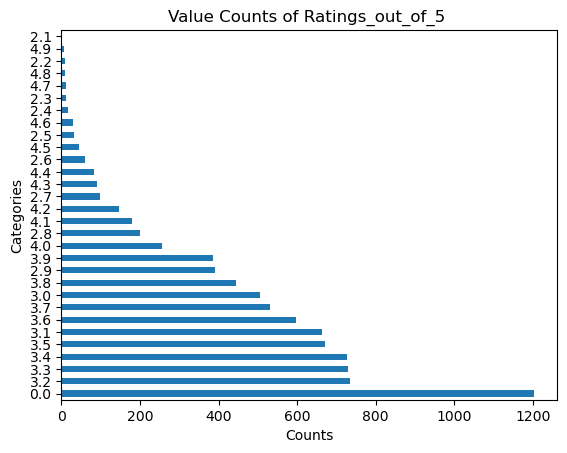

In [24]:
# now we just visulise Ratings_out_of_5's data
zd['Ratings_out_of_5'].value_counts().head(30).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Value Counts of Ratings_out_of_5 ')
plt.show()

### Examine:Sponsored

In [25]:
zd['Sponsored'].value_counts()

Quick Bites                   3694
Casual Dining                 1913
Takeaway, Delivery             707
Delivery                       646
Casual Dining, Bar             288
                              ... 
Microbrewery, Pub                1
Club, Lounge                     1
Café, Lounge                     1
Microbrewery                     1
Dessert Parlor, Sweet Shop       1
Name: Sponsored, Length: 79, dtype: int64

In [26]:
zd['Sponsored'].value_counts().head(30)


Quick Bites                    3694
Casual Dining                  1913
Takeaway, Delivery              707
Delivery                        646
Casual Dining, Bar              288
Café                            284
Dessert Parlor                  193
Bar, Casual Dining              167
Bakery                          162
Food Court                      113
Takeaway                         61
Sweet Shop                       60
Beverage Shop                    50
Food Truck                       49
Dhaba                            39
Bakery, Dessert Parlor           37
Lounge                           36
Bar                              25
Kiosk                            22
Fine Dining                      22
Lounge, Casual Dining            21
Dessert Parlor, Quick Bites      20
Beverage Shop, Quick Bites       18
Pub, Casual Dining               15
Bakery, Quick Bites              15
Casual                           15
Lounge, Bar                      14
Café, Dessert Parlor        

In [27]:
zd['Sponsored'].isnull().sum()


0

In [28]:
zd.dropna(subset=['Sponsored'], inplace=True)


In [29]:
# now we can do one_hot_encoding to Sponsored
#let's find the top 20 most frequent categories for column: Ratings_out_of_5
zd.Sponsored.value_counts().sort_values(ascending=False).head(30)


Quick Bites                    3694
Casual Dining                  1913
Takeaway, Delivery              707
Delivery                        646
Casual Dining, Bar              288
Café                            284
Dessert Parlor                  193
Bar, Casual Dining              167
Bakery                          162
Food Court                      113
Takeaway                         61
Sweet Shop                       60
Beverage Shop                    50
Food Truck                       49
Dhaba                            39
Bakery, Dessert Parlor           37
Lounge                           36
Bar                              25
Fine Dining                      22
Kiosk                            22
Lounge, Casual Dining            21
Dessert Parlor, Quick Bites      20
Beverage Shop, Quick Bites       18
Pub, Casual Dining               15
Bakery, Quick Bites              15
Casual                           15
Lounge, Bar                      14
Café, Dessert Parlor        

In [30]:
# Let's make a list with the most frequent categories of the variable

top_20=[x for x in zd.Sponsored.value_counts().sort_values(ascending=False).head(20).index ]
top_20

['Quick Bites',
 'Casual Dining',
 'Takeaway, Delivery',
 'Delivery',
 'Casual Dining, Bar',
 'Café',
 'Dessert Parlor',
 'Bar, Casual Dining',
 'Bakery',
 'Food Court',
 'Takeaway',
 'Sweet Shop',
 'Beverage Shop',
 'Food Truck',
 'Dhaba',
 'Bakery, Dessert Parlor',
 'Lounge',
 'Bar',
 'Fine Dining',
 'Kiosk']

In [31]:
# and now we make the 20 binary columns:

for label in top_20:
       zd[label]=np.where(zd['Sponsored']== label,1,0)
        
zd[['Sponsored']+top_20].head(20)

,Sponsored,Quick Bites,Casual Dining,"Takeaway, Delivery",Delivery,"Casual Dining, Bar",Café,Dessert Parlor,"Bar, Casual Dining",Bakery,...,Takeaway,Sweet Shop,Beverage Shop,Food Truck,Dhaba,"Bakery, Dessert Parlor",Lounge,Bar,Fine Dining,Kiosk
0,Casual Dining,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Lounge, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fine Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,"Casual Dining, Bar",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bar, Casual Dining",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,"Bar, Casual Dining",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,Casual Dining,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"Pub, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Bakery,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Casual Dining,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# get whole set of dummy variables, for all the categorical variables:

def one_hot_top_x(zd,variable,top_x_labels):
    #function to create the dummy variables for the most frequent labels
    #we can varry the number of most frequent labels that we encode
    
    for label in top_x_labels:
        zd[variable+'_'+label]= np.where(zd[variable]== label,1,0)
        
#read the data again
data_file=r'zomato_pune_V002.csv'

#encode Sponsored into the 20 most frequent categories
one_hot_top_x(zd,'Sponsored',top_20)
zd.head()

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,Charges_for_two,payment_modes,Rest_timming,Wine and Beer,...,Sponsored_Takeaway,Sponsored_Sweet Shop,Sponsored_Beverage Shop,Sponsored_Food Truck,Sponsored_Dhaba,"Sponsored_Bakery, Dessert Parlor",Sponsored_Lounge,Sponsored_Bar,Sponsored_Fine Dining,Sponsored_Kiosk
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029 votes,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm",0,...,0,0,0,0,0,0,0,0,0,0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,11am – 4am,0,...,0,0,0,0,0,0,0,0,0,0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291 votes,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,0,...,0,0,0,0,0,0,0,0,1,0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",12noon – 1am,0,...,0,0,0,0,0,0,0,0,0,0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",9am – 1am,0,...,0,0,0,0,0,0,0,0,0,0


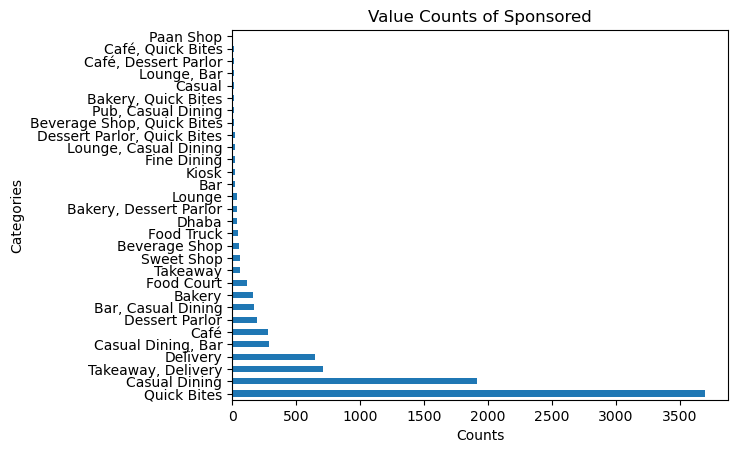

In [33]:
# now we just visulise Sponsored's data

zd['Sponsored'].value_counts().head(30).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Value Counts of Sponsored')
plt.show()

### Examine:Number of votes

In [34]:
zd['Number of votes'].value_counts()

0                    1219
Based on 4 votes      327
Based on 6 votes      253
Based on 5 votes      233
Based on 7 votes      192
                     ... 
1235  votes             1
1819  votes             1
1887  votes             1
1814  votes             1
Based on 61 votes       1
Name: Number of votes, Length: 1036, dtype: int64

In [35]:
zd['Number of votes'].value_counts().head(30)

0                    1219
Based on 4 votes      327
Based on 6 votes      253
Based on 5 votes      233
Based on 7 votes      192
Based on 8 votes      162
Based on 9 votes      157
Based on 12 votes     129
Based on 10 votes     127
Based on 11 votes     126
Based on 13 votes     107
4  votes               93
Based on 14 votes      85
Based on 15 votes      84
Based on 16 votes      82
Based on 19 votes      74
Based on 18 votes      68
Based on 20 votes      61
15  votes              58
Based on 17 votes      58
14  votes              53
8  votes               51
12  votes              51
7  votes               51
11  votes              50
9  votes               48
10  votes              48
Based on 21 votes      45
26  votes              45
Based on 22 votes      44
Name: Number of votes, dtype: int64

In [36]:
zd['Number of votes'].unique()

array(['7029  votes', '2578  votes', '3291  votes', ..., '249  votes',
       '379  votes', 'Based on 61 votes'], dtype=object)

In [37]:
# Remove specific words from the "Number of votes" column
zd['Number of votes'] = zd['Number of votes'].str.replace('votes', '').str.replace('Based on', '')

# Convert the column to numeric data type
zd['Number of votes'] = pd.to_numeric(zd['Number of votes'], errors='coerce')


In [38]:
zd['Number of votes'].value_counts()

0.0       1219
4.0        420
6.0        292
5.0        276
7.0        243
          ... 
824.0        1
2521.0       1
282.0        1
1786.0       1
379.0        1
Name: Number of votes, Length: 875, dtype: int64

In [39]:
zd['Number of votes'].isnull().sum()


7

In [40]:
#remove the null values:
zd.dropna(subset=['Number of votes'], inplace=True)

In [41]:
#find the 30 most frequent categories for 'Locality'

top_30=[x for x in zd.Cuisines.value_counts().sort_values(ascending=False).head(30).index ]

#now create the 20 most frequent dummy variables for 'Locality'

one_hot_top_x(zd,'Number of votes',top_30)
zd.head()

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,Charges_for_two,payment_modes,Rest_timming,Wine and Beer,...,"Number of votes_Cafe, Fast Food","Number of votes_North Indian, South Indian, Chinese",Number of votes_Desserts,"Number of votes_North Indian, Chinese, Maharashtrian","Number of votes_North Indian, Chinese, Continental","Number of votes_North Indian, Mughlai","Number of votes_North Indian, Biryani","Number of votes_Chinese, Fast Food","Number of votes_North Indian, Mughlai, Chinese","Number of votes_Pizza, Fast Food"
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029.0,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm",0,...,0,0,0,0,0,0,0,0,0,0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578.0,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,11am – 4am,0,...,0,0,0,0,0,0,0,0,0,0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291.0,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,0,...,0,0,0,0,0,0,0,0,0,0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430.0,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",12noon – 1am,0,...,0,0,0,0,0,0,0,0,0,0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138.0,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",9am – 1am,0,...,0,0,0,0,0,0,0,0,0,0


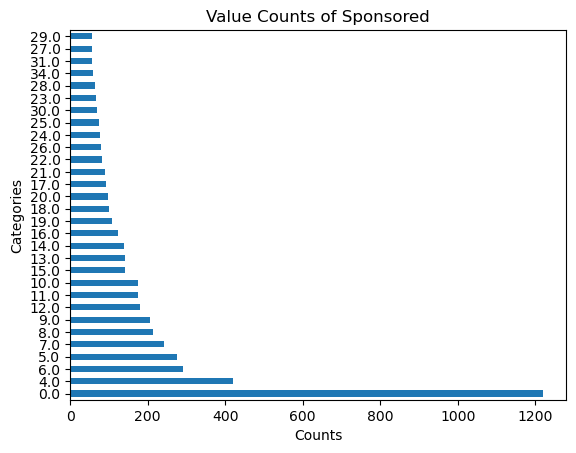

In [42]:
# now we just visulise Number of votes's data

zd['Number of votes'].value_counts().head(30).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Value Counts of Sponsored')
plt.show()

### Examine:Cuisines

In [43]:
zd['Cuisines'].value_counts()

North Indian, Chinese                                               619
North Indian                                                        534
Fast Food                                                           367
Chinese                                                             317
Street Food                                                         265
                                                                   ... 
North Indian, South Indian, Asian, Italian                            1
Finger Food, Bar Food, Italian, North Indian, Asian, Continental      1
North Indian, Italian, Continental, Chinese                           1
Biryani, South Indian, Andhra                                         1
North Indian, Fast Food, Continental                                  1
Name: Cuisines, Length: 2294, dtype: int64

In [44]:
zd['Cuisines'].value_counts().head(30)

North Indian, Chinese                   619
North Indian                            534
Fast Food                               367
Chinese                                 317
Street Food                             265
Maharashtrian                           249
Biryani                                 151
Chinese, North Indian                   127
Fast Food, Beverages                    127
South Indian                            122
Bakery                                  103
Maharashtrian, North Indian              99
North Indian, Maharashtrian              85
Bakery, Desserts                         85
North Indian, Chinese, Mughlai           79
North Indian, Fast Food                  72
North Indian, Chinese, Seafood           64
North Indian, Chinese, Fast Food         64
Cafe                                     62
Biryani, North Indian                    60
Cafe, Fast Food                          58
North Indian, South Indian, Chinese      55
Desserts                        

In [45]:
zd['Cuisines'].isnull().sum()


0

In [46]:
zd.dropna(subset=['Cuisines'], inplace=True)


In [47]:
#find the 20 most frequent categories for 'Cuisines'

top_30=[x for x in zd.Cuisines.value_counts().sort_values(ascending=False).head(30).index ]

#now create the 20 most frequent dummy variables for 'Locality'

one_hot_top_x(zd,'Cuisines',top_30)
zd.head()

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,Charges_for_two,payment_modes,Rest_timming,Wine and Beer,...,"Cuisines_Cafe, Fast Food","Cuisines_North Indian, South Indian, Chinese",Cuisines_Desserts,"Cuisines_North Indian, Chinese, Maharashtrian","Cuisines_North Indian, Chinese, Continental","Cuisines_North Indian, Mughlai","Cuisines_North Indian, Biryani","Cuisines_Chinese, Fast Food","Cuisines_North Indian, Mughlai, Chinese","Cuisines_Pizza, Fast Food"
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029.0,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm",0,...,0,0,0,0,0,0,0,0,0,0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578.0,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,11am – 4am,0,...,0,0,0,0,0,0,0,0,0,0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291.0,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,0,...,0,0,0,0,0,0,0,0,0,0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430.0,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",12noon – 1am,0,...,0,0,0,0,0,0,0,0,0,0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138.0,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",9am – 1am,0,...,0,0,0,0,0,0,0,0,0,0


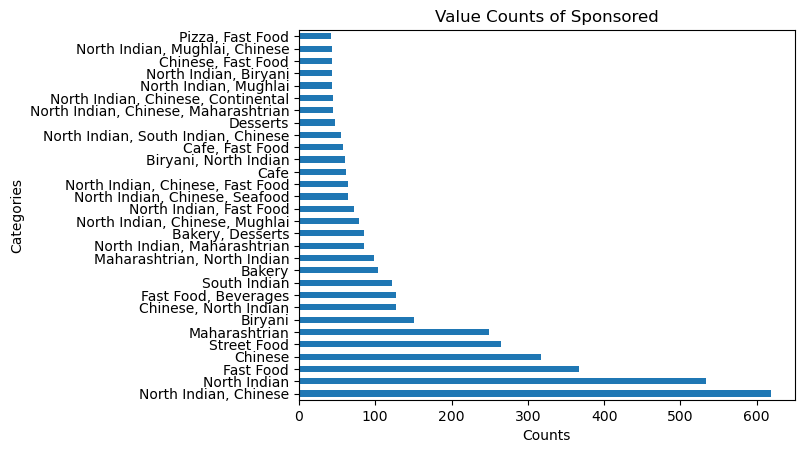

In [48]:
# now we just visulise Cuisines's data

zd['Cuisines'].value_counts().head(30).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Value Counts of Sponsored')
plt.show()

### Examine:Charges_for_two

In [49]:
zd['Charges_for_two'].value_counts()

Not Present    1429
₹300            983
₹400            921
₹500            832
₹200            666
₹600            484
₹250            477
₹350            375
₹150            335
₹450            283
₹700            282
₹800            244
₹1,000          200
₹100            192
₹550            165
₹1,200          140
₹1,500          119
₹650            106
₹900             83
₹1,300           80
₹750             71
₹1,400           64
₹1,100           53
₹1,600           50
₹2,000           39
₹850             33
₹1,800           32
₹1,700           30
₹2,500           17
₹950             12
₹2,100           11
₹2,200           10
₹3,000            8
₹1,900            5
₹1,250            3
₹2,600            3
₹1,050            3
₹2,900            3
₹1,650            1
₹2,800            1
₹160              1
₹1,550            1
₹50               1
₹280              1
₹4,500            1
₹1,950            1
₹999              1
₹3,200            1
₹1,150            1
₹420              1


In [50]:
zd['Charges_for_two'].value_counts().head(30)

Not Present    1429
₹300            983
₹400            921
₹500            832
₹200            666
₹600            484
₹250            477
₹350            375
₹150            335
₹450            283
₹700            282
₹800            244
₹1,000          200
₹100            192
₹550            165
₹1,200          140
₹1,500          119
₹650            106
₹900             83
₹1,300           80
₹750             71
₹1,400           64
₹1,100           53
₹1,600           50
₹2,000           39
₹850             33
₹1,800           32
₹1,700           30
₹2,500           17
₹950             12
Name: Charges_for_two, dtype: int64

In [51]:
zd['Charges_for_two'].unique()

array(['₹1,400', '₹1,500', '₹2,500', '₹1,700', '₹150', '₹1,300', '₹1,000',
       '₹250', '₹1,800', '₹1,600', '₹700', '₹900', '₹2,000', '₹600',
       '₹1,200', '₹550', '₹2,200', '₹1,100', '₹500', '₹850', '₹300',
       '₹2,100', '₹800', '₹400', '₹450', '₹650', '₹1,250', '₹950', '₹200',
       '₹3,200', '₹350', '₹100', 'Not Present', '₹1,900', '₹3,000',
       '₹750', '₹2,600', '₹2,700', '₹1,050', '₹1,350', '₹4,200', '₹4,000',
       '₹2,00,250', '₹2,400', '₹1,750', '₹3,100', '₹420', '₹1,150',
       '₹1,650', '₹2,900', '₹999', '₹1,950', '₹4,500', '₹280', '₹50',
       '₹1,550', '₹160', '₹2,800', '₹3,500'], dtype=object)

In [52]:
# Remove '₹' symbol from 'Charges_for_two' column
zd['Charges_for_two'] = zd['Charges_for_two'].str.replace('₹', '')

# Remove commas from 'Charges_for_two' column
zd['Charges_for_two'] = zd['Charges_for_two'].str.replace(',', '')

# Convert 'Charges_for_two' column to numeric data type
#zd['Charges_for_two'] = pd.to_numeric(zp['Charges_for_two'])
zd['Charges_for_two'] = pd.to_numeric(zd['Charges_for_two'], errors='coerce')

In [53]:
zd['Charges_for_two'].isnull().sum()


1429

In [54]:
zd.dropna(subset=['Charges_for_two'], inplace=True)


In [55]:
zd['Charges_for_two'].isnull().sum()


0

In [56]:
# Remove 'Not Present' 
zd = zd[zd['Charges_for_two'] != 'Not Present']


In [57]:
# Count the value occurrences in the 'Charges_for_two' column
value_counts = zd['Charges_for_two'].value_counts()

# Get the values with counts less than 20
to_drop = value_counts[value_counts < 20].index

# Drop rows with values to drop from the DataFrame
zd = zd[~zd['Charges_for_two'].isin(to_drop)]



In [58]:
zd['Charges_for_two'].value_counts()

300.0     983
400.0     921
500.0     832
200.0     666
600.0     484
250.0     477
350.0     375
150.0     335
450.0     283
700.0     282
800.0     244
1000.0    200
100.0     192
550.0     165
1200.0    140
1500.0    119
650.0     106
900.0      83
1300.0     80
750.0      71
1400.0     64
1100.0     53
1600.0     50
2000.0     39
850.0      33
1800.0     32
1700.0     30
Name: Charges_for_two, dtype: int64

In [59]:
column_data_type = zd['Charges_for_two'].dtype

print(column_data_type)


float64


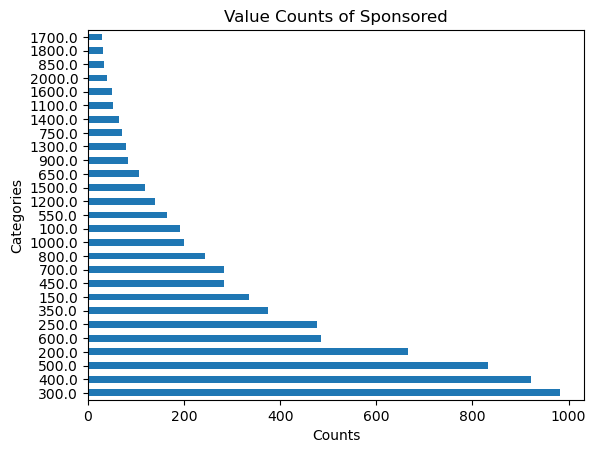

In [60]:
# now we just visulise Charges_for_two's data

zd['Charges_for_two'].value_counts().head(30).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Value Counts of Sponsored')
plt.show()

### Examine:payment_modes

In [61]:
zd['payment_modes'].value_counts()

Cash,Cards and Digital Payments accepted                 2042
Cash and Cards accepted                                  1911
Cash and Digital Payments accepted                       1599
Cash only                                                1561
Cash,Cards and Meal Coupons accepted                       98
Cash,Debit Cards and Digital Payments accepted             55
Cash,Cards,Meal Coupons and Digital Payments accepted      49
Cash and Debit Cards accepted                              14
Cash and Meal Coupons accepted                              5
Cash,Meal Coupons and Digital Payments accepted             3
Debit Cards accepted                                        1
Cards only                                                  1
Name: payment_modes, dtype: int64

In [62]:
zd['payment_modes'].value_counts().head(30)

Cash,Cards and Digital Payments accepted                 2042
Cash and Cards accepted                                  1911
Cash and Digital Payments accepted                       1599
Cash only                                                1561
Cash,Cards and Meal Coupons accepted                       98
Cash,Debit Cards and Digital Payments accepted             55
Cash,Cards,Meal Coupons and Digital Payments accepted      49
Cash and Debit Cards accepted                              14
Cash and Meal Coupons accepted                              5
Cash,Meal Coupons and Digital Payments accepted             3
Debit Cards accepted                                        1
Cards only                                                  1
Name: payment_modes, dtype: int64

In [63]:
zd['payment_modes'].unique()

array(['Cash and Cards accepted',
       'Cash,Cards and Digital Payments accepted', 'Cash only',
       'Cash and Digital Payments accepted',
       'Cash,Cards and Meal Coupons accepted',
       'Cash,Cards,Meal Coupons and Digital Payments accepted',
       'Cash,Debit Cards and Digital Payments accepted',
       'Cash and Meal Coupons accepted', 'Cash and Debit Cards accepted',
       'Debit Cards accepted',
       'Cash,Meal Coupons and Digital Payments accepted', 'Cards only'],
      dtype=object)

In [64]:
zd['payment_modes'].isnull().sum()


0

In [65]:
zd.dropna(subset=['payment_modes'], inplace=True)


#### now one_hot_encoding

In [66]:
#create dummy columns:
payment_modes_dummies=pd.get_dummies(zd['payment_modes'],prefix='payment_modes')
payment_modes_dummies

,payment_modes_Cards only,payment_modes_Cash and Cards accepted,payment_modes_Cash and Debit Cards accepted,payment_modes_Cash and Digital Payments accepted,payment_modes_Cash and Meal Coupons accepted,payment_modes_Cash only,"payment_modes_Cash,Cards and Digital Payments accepted","payment_modes_Cash,Cards and Meal Coupons accepted","payment_modes_Cash,Cards,Meal Coupons and Digital Payments accepted","payment_modes_Cash,Debit Cards and Digital Payments accepted","payment_modes_Cash,Meal Coupons and Digital Payments accepted",payment_modes_Debit Cards accepted
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12179,0,0,0,1,0,0,0,0,0,0,0,0
12181,0,1,0,0,0,0,0,0,0,0,0,0
12186,0,0,0,1,0,0,0,0,0,0,0,0
12187,0,0,0,0,0,0,1,0,0,0,0,0


In [67]:
zp= pd.concat([zd,payment_modes_dummies],axis=1)

In [68]:
#del payment_modes_dummies

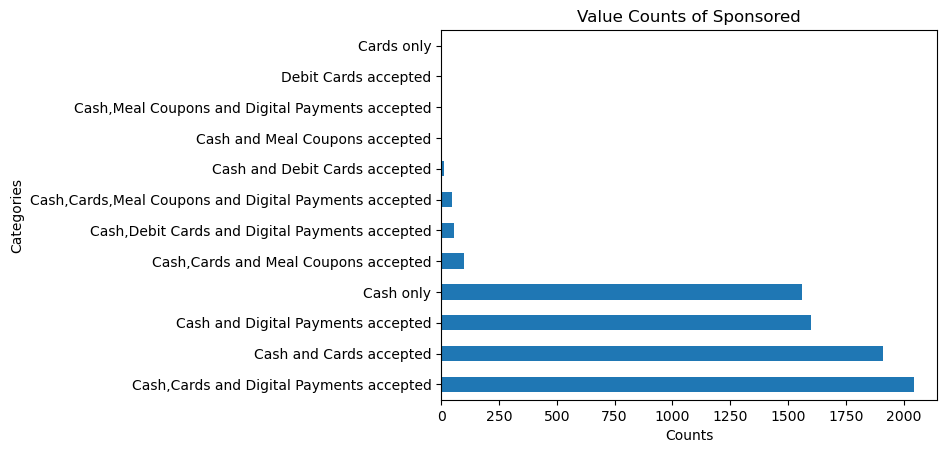

In [69]:
# now we just visulise payment_modes's data

zd['payment_modes'].value_counts().head(30).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Value Counts of Sponsored')
plt.show()

### Examine:Locality

In [70]:
zd['Locality'].value_counts()

Kothrud                         364
Wakad                           319
Hadapsar                        318
Hinjawadi                       289
Viman Nagar                     287
                               ... 
Camp-MG Road Area                 1
Magarpatta, Pune Sholapur Rd      1
Ghorpadi                          1
Koregaon Bhima                    1
Bopkhel                           1
Name: Locality, Length: 97, dtype: int64

In [71]:
zd['Locality'].value_counts().head(30)

Kothrud            364
Wakad              319
Hadapsar           318
Hinjawadi          289
Viman Nagar        287
Baner              278
Sinhgad Road       272
Kharadi            250
Chinchwad          189
Kondhwa            181
Pimpri             178
Katraj             165
Pimple Saudagar    162
Aundh              138
Wagholi            138
Bhosari            133
Karve Nagar        128
Koregaon Park      125
Camp Area          120
Bavdhan            119
Sadashiv Peth      111
NIBM Road          106
Nigdi              105
Narhe              103
Pimple Gurav       102
Lonavala            99
Balewadi            94
Magarpatta          94
Shivaji Nagar       93
Wadgaon Sheri       89
Name: Locality, dtype: int64

In [72]:
zd['Locality'].unique()

array(['Hinjawadi', 'Bhugaon', 'Shivaji Nagar', 'Wakad', 'East Street',
       'Yerawada', 'Bavdhan', 'Kalyani Nagar', 'Narhe',
       'Bund Garden Road', 'Viman Nagar', 'Magarpatta', 'Deccan Gymkhana',
       'Hadapsar', 'Baner', 'Sus', 'Shivapur', 'Mundhwa', 'FC Road',
       'Kothrud', 'Koregaon Park', 'Erandwane', 'Senapati Bapat Road',
       'MG Road', 'Karve Nagar', 'Sadashiv Peth', 'Pune University',
       'JM Road', 'Dhole Patil Road', 'Camp Area', 'Kharadi', 'Ravet',
       'Aundh', 'Nigdi', 'Kondhwa', 'Swargate', 'Katraj', 'Khadki',
       'Law College Road', 'Pimple Nilakh', 'Pashan', 'Lonavala',
       'Pimple Saudagar', 'Balewadi', 'Dange Chowk', 'NIBM Road',
       'Pimpri', 'Wanowrie Kondhwa Area', 'Chinchwad', 'Chandan Nagar',
       'Fatima Nagar', 'Budhwar Peth', 'SB Road - Aundh', 'Warje',
       'Wagholi', 'Akurdi', 'Bibvewadi', 'Rasta Peth', 'Wadgaon Sheri',
       'Sinhgad Road', 'Model Colony', 'Parvati', 'Lohegaon',
       'Salunkhe Vihar Road', 'Bhosari', 'Sa

In [73]:
zd['Locality'].isnull().sum()


0

In [74]:
zd.dropna(subset=['Locality'], inplace=True)


In [75]:
#find the 30 most frequent categories for 'Locality'

top_30=[x for x in zd.Locality.value_counts().sort_values(ascending=False).head(30).index ]

#now create the 20 most frequent dummy variables for 'Locality'

one_hot_top_x(zd,'Locality',top_30)
zd.head()

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,Charges_for_two,payment_modes,Rest_timming,Wine and Beer,...,Locality_Sadashiv Peth,Locality_NIBM Road,Locality_Nigdi,Locality_Narhe,Locality_Pimple Gurav,Locality_Lonavala,Locality_Balewadi,Locality_Magarpatta,Locality_Shivaji Nagar,Locality_Wadgaon Sheri
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029.0,"Continental, North Indian, Chinese",1400.0,Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm",0,...,0,0,0,0,0,0,0,0,0,0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578.0,"North Indian, Chinese, Continental, Kebab, Sea...",1500.0,Cash and Cards accepted,11am – 4am,0,...,0,0,0,0,0,0,0,0,0,0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430.0,"Asian, European, Modern Indian, Italian",1400.0,"Cash,Cards and Digital Payments accepted",12noon – 1am,0,...,0,0,0,0,0,0,0,0,0,0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138.0,"North Indian, Chinese, Biryani, American, Cont...",1500.0,"Cash,Cards and Digital Payments accepted",9am – 1am,0,...,0,0,0,0,0,0,0,0,1,0
5,Flechazo,Wakad,"Bar, Casual Dining",4.6,4731.0,"Asian, Mediterranean, North Indian",1400.0,Cash and Cards accepted,"11:30am – 4pm, 6:30pm – 12midnight",0,...,0,0,0,0,0,0,0,0,0,0


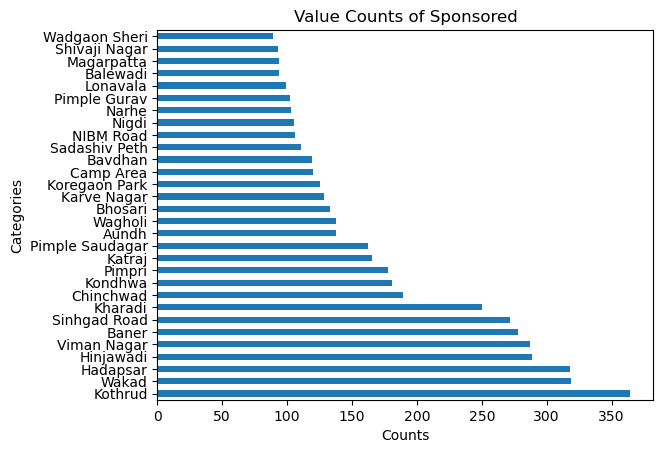

In [76]:
# now we just visulise Locality's data

zd['Locality'].value_counts().head(30).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Value Counts of Sponsored')
plt.show()

In [77]:
zd.dtypes

Restaurant_Name            object
Locality                   object
Sponsored                  object
Ratings_out_of_5          float64
Number of votes           float64
                           ...   
Locality_Lonavala           int32
Locality_Balewadi           int32
Locality_Magarpatta         int32
Locality_Shivaji Nagar      int32
Locality_Wadgaon Sheri      int32
Length: 226, dtype: object

### let's start visulisation of  data

In [78]:
#Restaurant_Name with Locality:
restaurant_counts = zd.groupby('Locality')['Restaurant_Name'].count()
restaurant_counts

Locality
Akurdi                    76
Aundh                    138
B.T. Kawade Road          16
Balewadi                  94
Baner                    278
                        ... 
Wakad                    319
Wanowrie                  62
Wanowrie Kondhwa Area      8
Warje                     55
Yerawada                  58
Name: Restaurant_Name, Length: 97, dtype: int64

In [79]:
sorted_restaurant_counts = restaurant_counts.sort_values(ascending=False)
sorted_restaurant_counts

Locality
Kothrud                         364
Wakad                           319
Hadapsar                        318
Hinjawadi                       289
Viman Nagar                     287
                               ... 
Camp-MG Road Area                 1
Koregaon Bhima                    1
Magarpatta, Pune Sholapur Rd      1
Bopkhel                           1
Ghorpadi                          1
Name: Restaurant_Name, Length: 97, dtype: int64

In [80]:
#Extract the top localities and their corresponding restaurant counts:
top_localities = sorted_restaurant_counts.index[:20]  # Adjust the number as desired
top_counts = sorted_restaurant_counts[:20]  # Adjust the number as desired


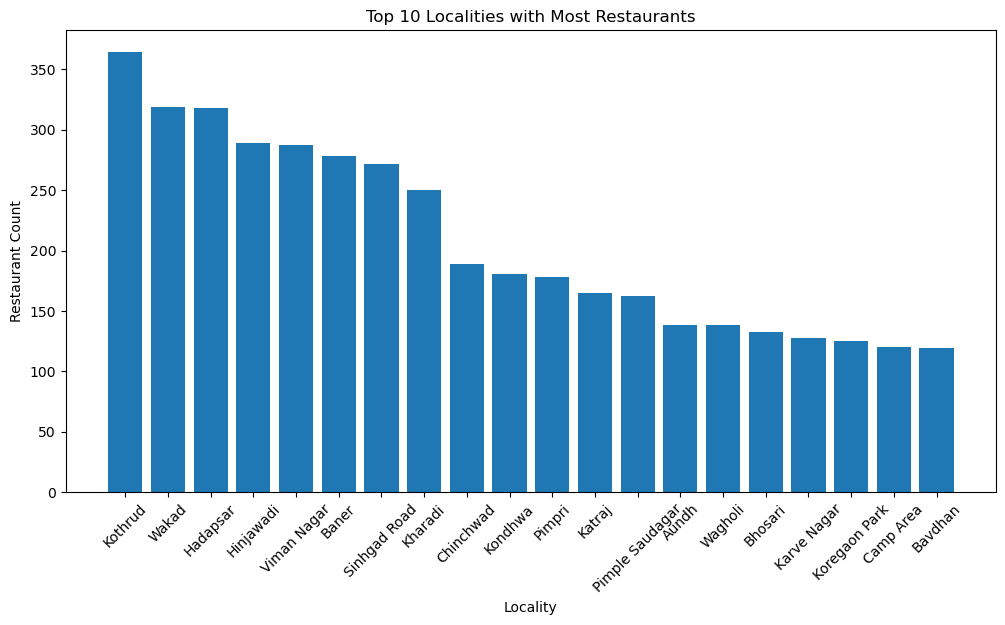

In [81]:
# now we just visulise Locality's data

plt.figure(figsize=(12, 6))
plt.bar(top_localities, top_counts)
plt.xticks(rotation=45)
plt.xlabel('Locality')
plt.ylabel('Restaurant Count')
plt.title('Top 10 Localities with Most Restaurants')
plt.show()


In [82]:
# Group by 'Locality' and calculate average ratings
average_ratings = zd.groupby('Locality')['Ratings_out_of_5'].mean()

# Convert the result to a DataFrame for better visualization
average_ratings_df = pd.DataFrame(average_ratings).reset_index()

# Print the average ratings for each city
print(average_ratings_df)


                 Locality  Ratings_out_of_5
0                  Akurdi          3.307895
1                   Aundh          3.336957
2        B.T. Kawade Road          3.243750
3                Balewadi          2.986170
4                   Baner          3.428058
..                    ...               ...
92                  Wakad          3.115047
93               Wanowrie          3.356452
94  Wanowrie Kondhwa Area          3.750000
95                  Warje          2.901818
96               Yerawada          3.129310

[97 rows x 2 columns]


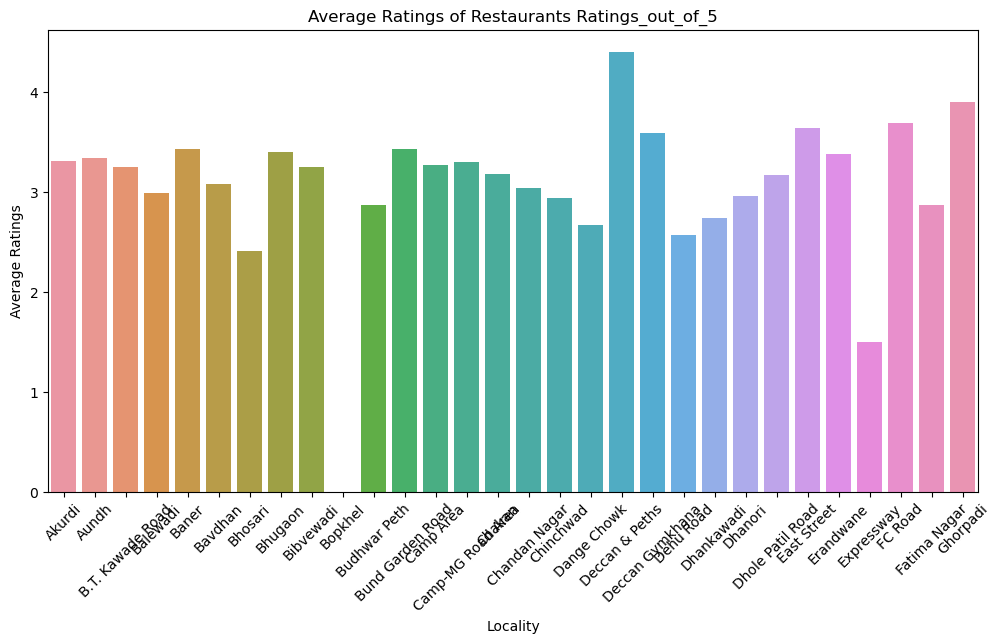

In [83]:
# Group by 'Locality' and calculate average ratings
average_ratings = zd.groupby('Locality')['Ratings_out_of_5'].mean().head(30)

# Convert the result to a DataFrame for better visualization
average_ratings_df = pd.DataFrame(average_ratings).reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar plot using Seaborn
sns.barplot(data=average_ratings_df, x='Locality', y='Ratings_out_of_5')
plt.xticks(rotation=45)
plt.xlabel('Locality')
plt.ylabel('Average Ratings')
plt.title('Average Ratings of Restaurants Ratings_out_of_5')

# Display the plot
plt.show()


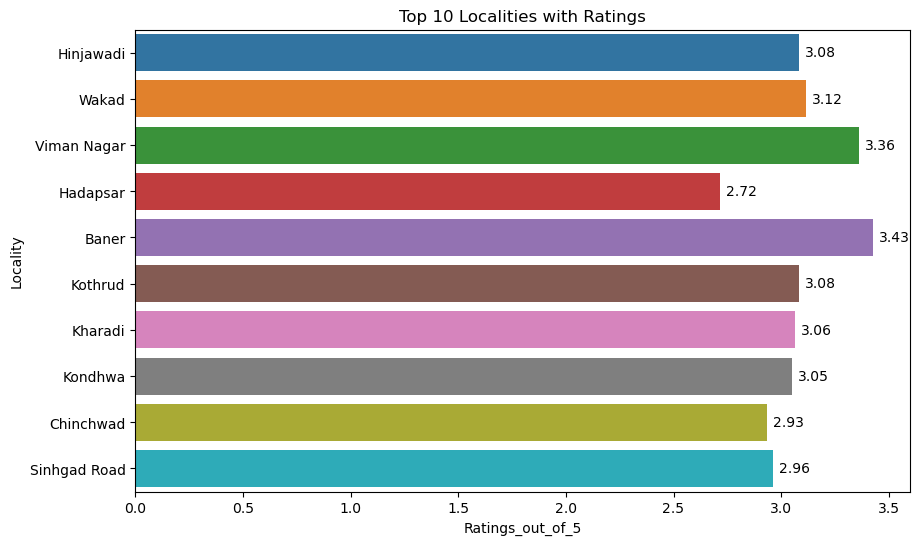

In [84]:
# Get the top 10 values based on 'Locality' column
top_10_localities = zd['Locality'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 localities
filtered_df = zd[zd['Locality'].isin(top_10_localities.index)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot using Seaborn and Matplotlib
ax = sns.barplot(data=filtered_df, x='Ratings_out_of_5', y='Locality', ci=None)

# Set the labels and title
plt.xlabel('Ratings_out_of_5')
plt.ylabel('Locality')
plt.title('Top 10 Localities with Ratings')

# Add value annotations above each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='center', va='center')

# Display the plot
plt.show()


### Sponsored Vs Ratings_out_of_5:

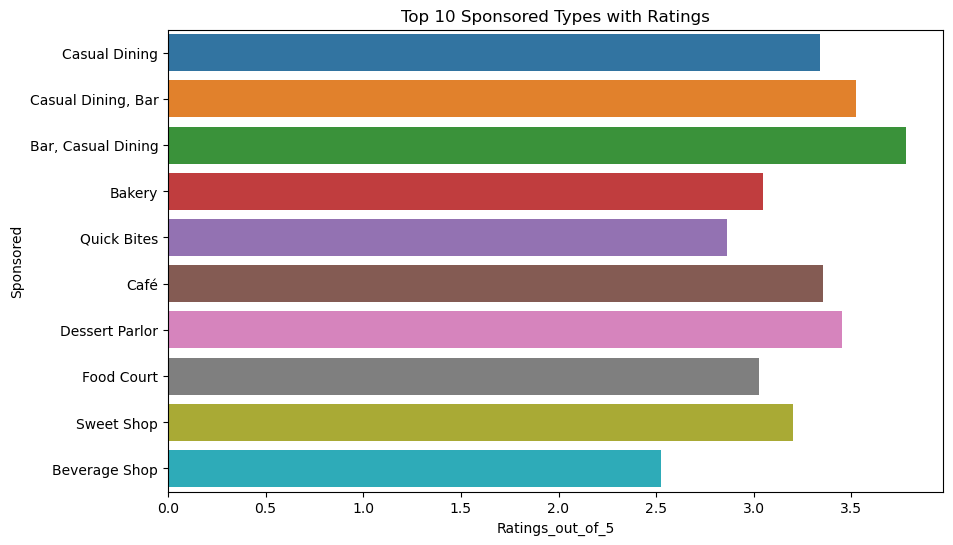

In [85]:
# Filter the DataFrame to include only the top 10 values in the 'Sponsored' column
top_10_sponsored = zd['Sponsored'].value_counts().nlargest(10).index

# Filter the DataFrame based on the top 10 sponsored values
filtered_data = zd[zd['Sponsored'].isin(top_10_sponsored)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the horizontal bar plot using Seaborn
sns.barplot(data=filtered_data, y='Sponsored', x='Ratings_out_of_5', ci=None, orient='h')

# Set the labels and title
plt.xlabel('Ratings_out_of_5')
plt.ylabel('Sponsored')
plt.title('Top 10 Sponsored Types with Ratings')

# Display the plot
plt.show()


### Number of votes VS Ratings_out_of_5 : 

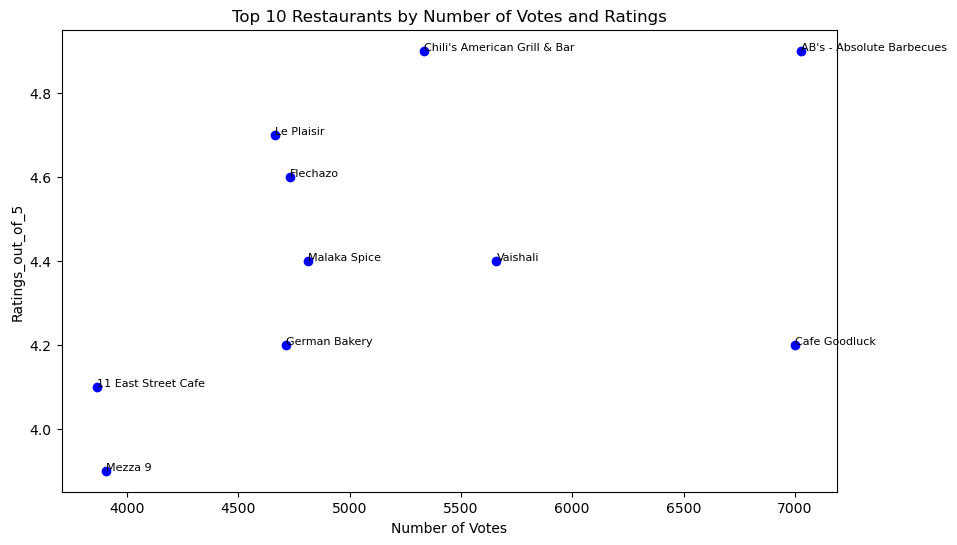

In [86]:
# Get the top 10 values based on 'Number of votes'
top_10_votes = zd.nlargest(10, 'Number of votes')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the scatter plot
plt.scatter(top_10_votes['Number of votes'], top_10_votes['Ratings_out_of_5'], color='blue')

# Set the labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Ratings_out_of_5')
plt.title('Top 10 Restaurants by Number of Votes and Ratings')

# Add labels for each point
for i, row in top_10_votes.iterrows():
    plt.annotate(row['Restaurant_Name'], (row['Number of votes'], row['Ratings_out_of_5']), fontsize=8)

# Display the plot
plt.show()


### Cuisines  VS  Ratings_out_of_5 :

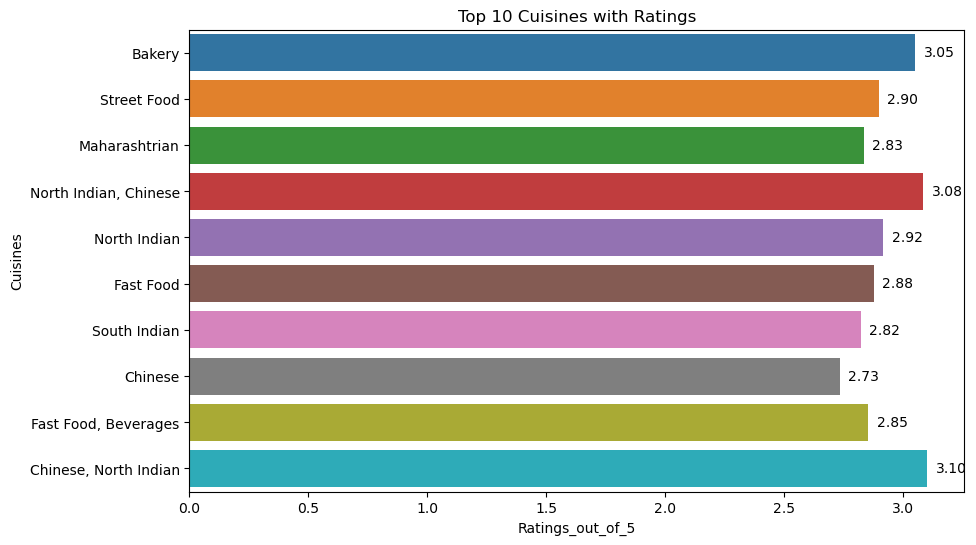

In [87]:
# Get the top 10 values based on 'Cuisines' column
top_10_cuisines = zd['Cuisines'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 cuisines
filtered_df = zd[zd['Cuisines'].isin(top_10_cuisines.index)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot using Seaborn and Matplotlib
ax = sns.barplot(data=filtered_df, x='Ratings_out_of_5', y='Cuisines', ci=None)

# Set the labels and title
plt.xlabel('Ratings_out_of_5')
plt.ylabel('Cuisines')
plt.title('Top 10 Cuisines with Ratings')

# Add value annotations above each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='center', va='center')

# Display the plot
plt.show()

### Charges_for_two VS Ratings_out_of_5


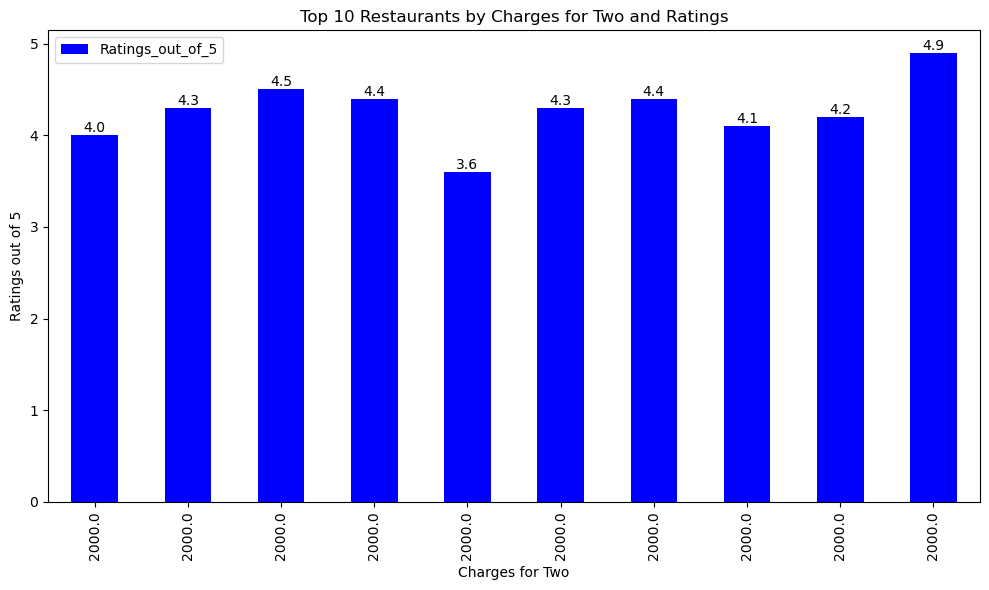

In [88]:
# Sort the DataFrame by the "Charges_for_two" column in descending order and take the top 10 rows
top_10_zd = zd.nlargest(10, "Charges_for_two")

# Extract the necessary columns
charges_for_two = top_10_zd["Charges_for_two"]
ratings_out_of_5 = top_10_zd["Ratings_out_of_5"]

# Plot the graph
ax = top_10_zd.plot(x="Charges_for_two", y="Ratings_out_of_5", kind="bar", color="blue", figsize=(10, 6))

# Add labels and title
ax.set_xlabel("Charges for Two")
ax.set_ylabel("Ratings out of 5")
ax.set_title("Top 10 Restaurants by Charges for Two and Ratings")

# Display the values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


### payment_modes VS Ratings_out_of_5 :

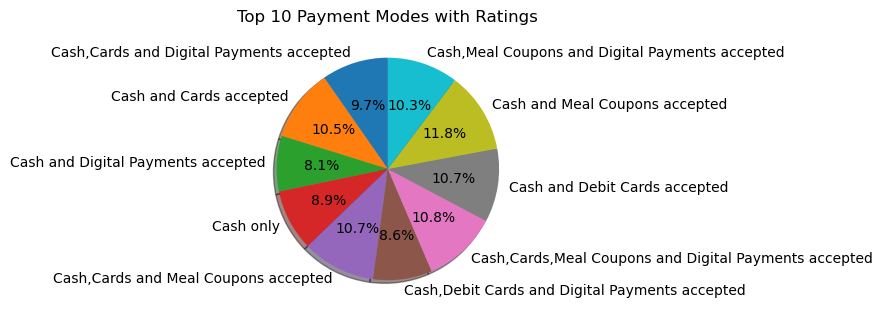

In [89]:
# Get the top 10 payment modes and their average ratings
top_10_modes = zd['payment_modes'].value_counts().head(10).index
top_10_ratings = zd.groupby('payment_modes')['Ratings_out_of_5'].mean().loc[top_10_modes]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the pie chart
ax.pie(top_10_ratings, labels=top_10_modes, autopct='%1.1f%%', startangle=90, shadow=True)

# Add title
ax.set_title("Top 10 Payment Modes with Ratings")

# Show the plot
plt.tight_layout()
plt.show()


### Dance Floor With Ratings_out_of_5

In [90]:
zd['Dance Floor'].value_counts()

0    7284
1      55
Name: Dance Floor, dtype: int64

In [91]:
zd['Dance Floor'].unique

<bound method Series.unique of 0        0
1        1
3        1
4        0
5        0
        ..
12179    0
12181    0
12186    0
12187    0
12188    0
Name: Dance Floor, Length: 7339, dtype: int64>

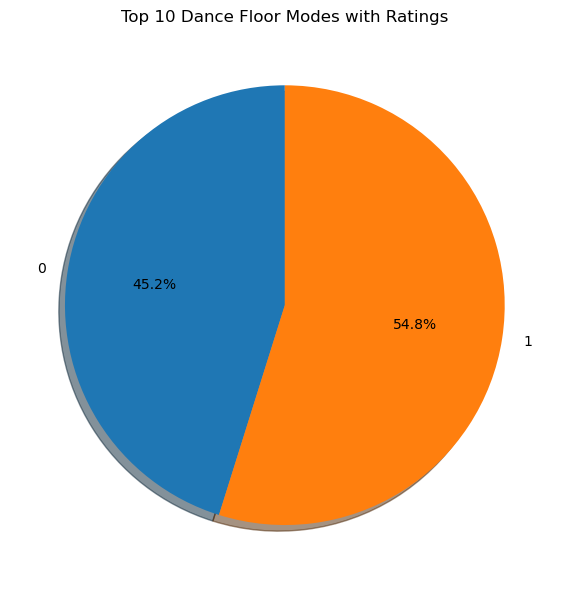

In [92]:
# Get the top 10 payment modes and their average ratings
top_10_modes = zd['Dance Floor'].value_counts().head(10).index
top_10_ratings = zd.groupby('Dance Floor')['Ratings_out_of_5'].mean().loc[top_10_modes]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the pie chart
ax.pie(top_10_ratings, labels=top_10_modes, autopct='%1.1f%%', startangle=90, shadow=True)

# Add title
ax.set_title("Top 10 Dance Floor Modes with Ratings")

# Show the plot
plt.tight_layout()
plt.show()

### Free Parking  VS  Ratings_out_of_5 :

In [93]:
zd['Free Parking'].count()

7339

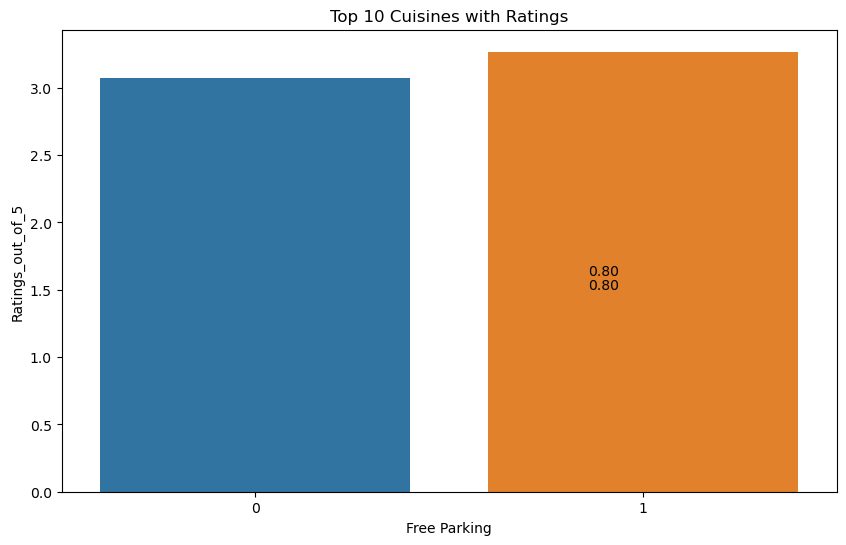

In [94]:
# Get the top 10 values based on 'Free Parking' column
top_10_cuisines = zd['Free Parking'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 cuisines
filtered_df = zd[zd['Free Parking'].isin(top_10_cuisines.index)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot using Seaborn and Matplotlib
ax = sns.barplot(data=filtered_df, x='Free Parking', y='Ratings_out_of_5', ci=None)

# Set the labels and title
plt.xlabel('Free Parking')
plt.ylabel('Ratings_out_of_5')
plt.title('Top 10 Cuisines with Ratings')

# Add value annotations above each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='center', va='center')

# Display the plot
plt.show()

### Specify the columns to compare

In [95]:
zd['Seaside'].count()

7339

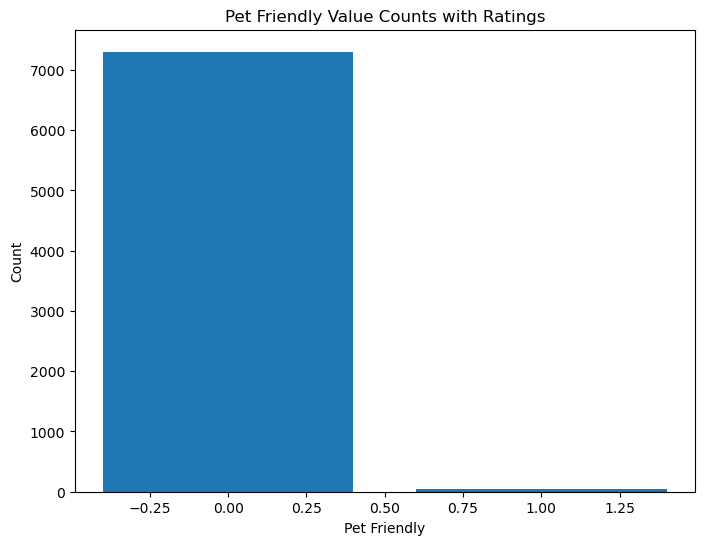

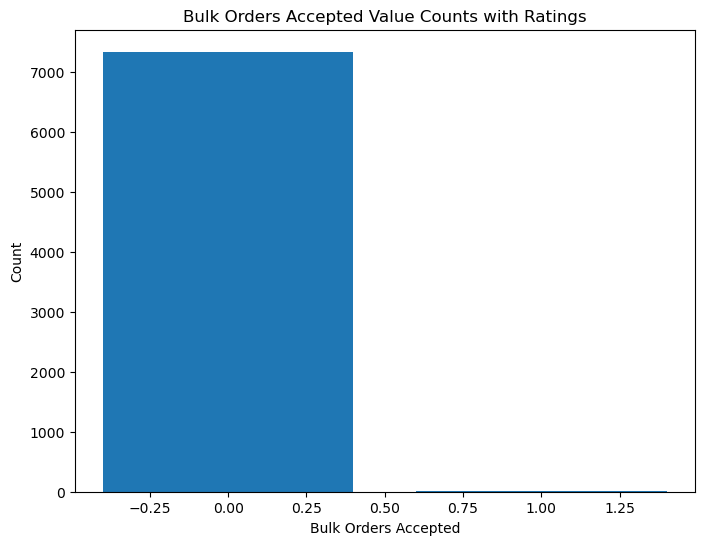

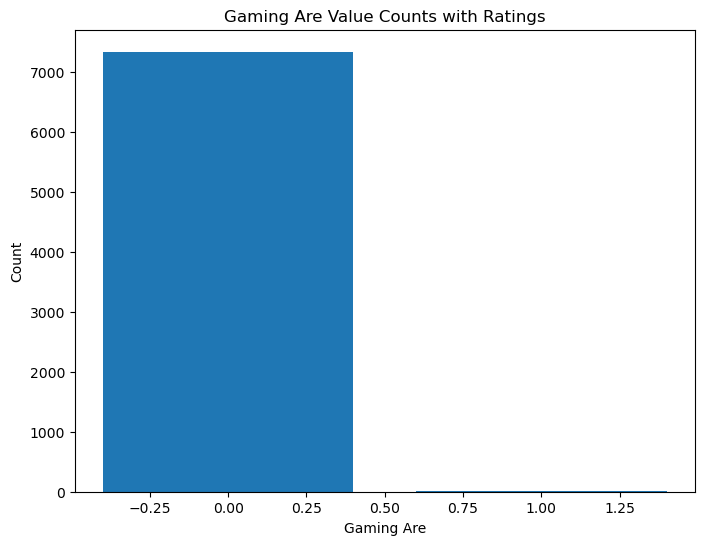

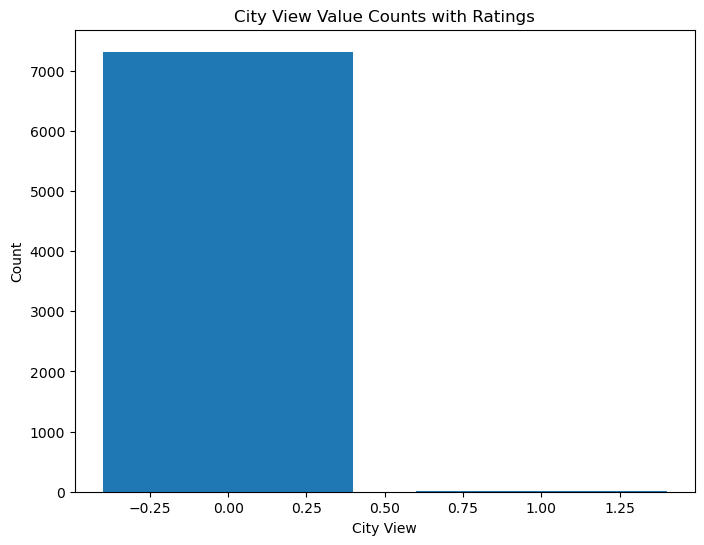

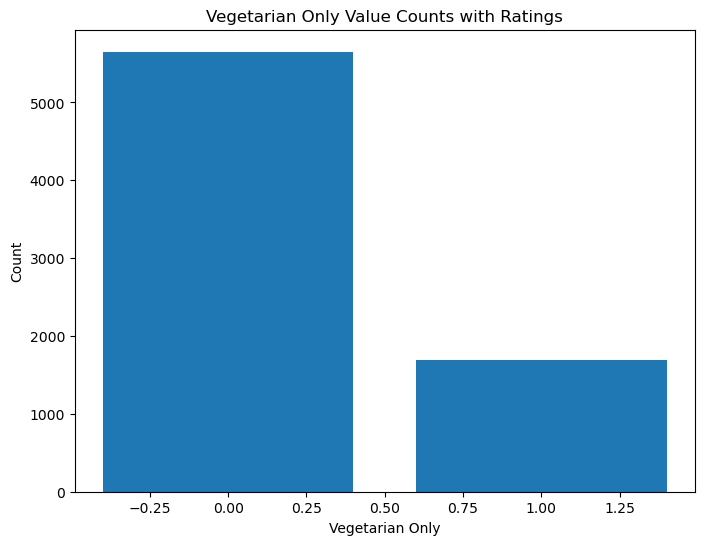

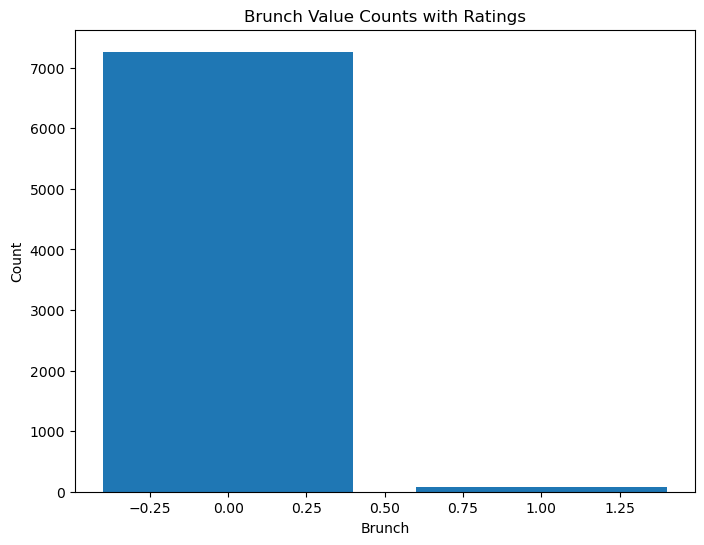

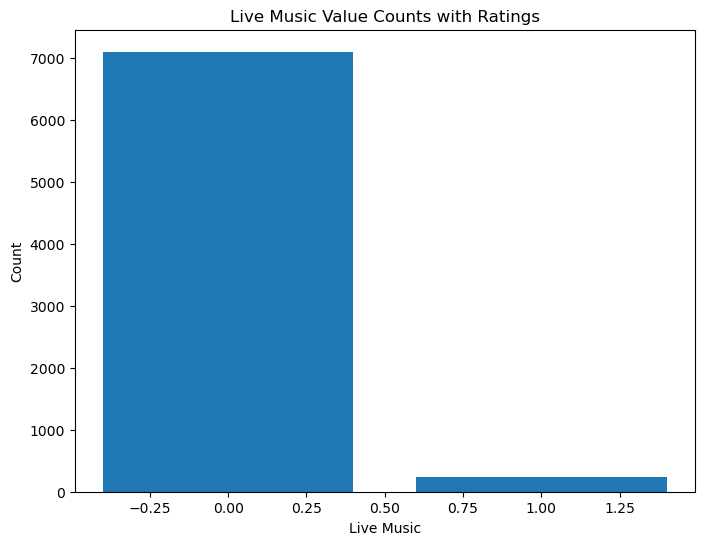

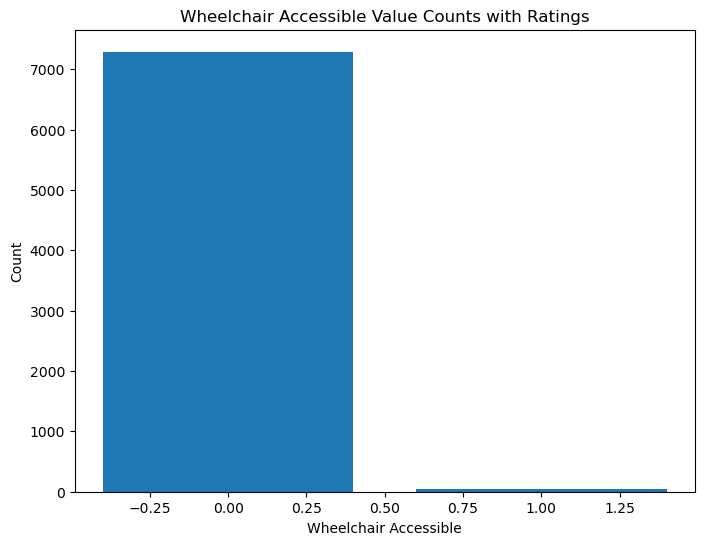

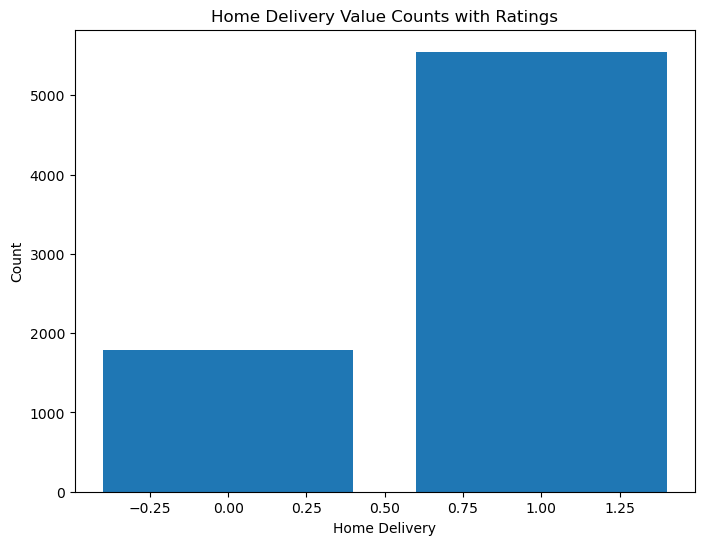

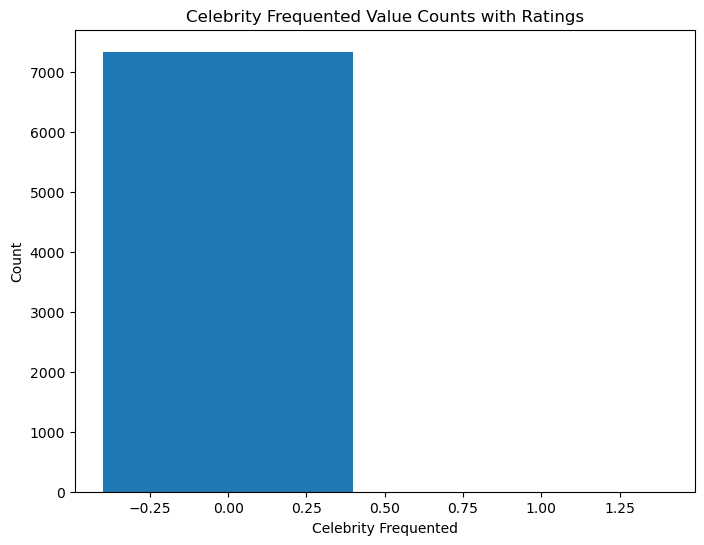

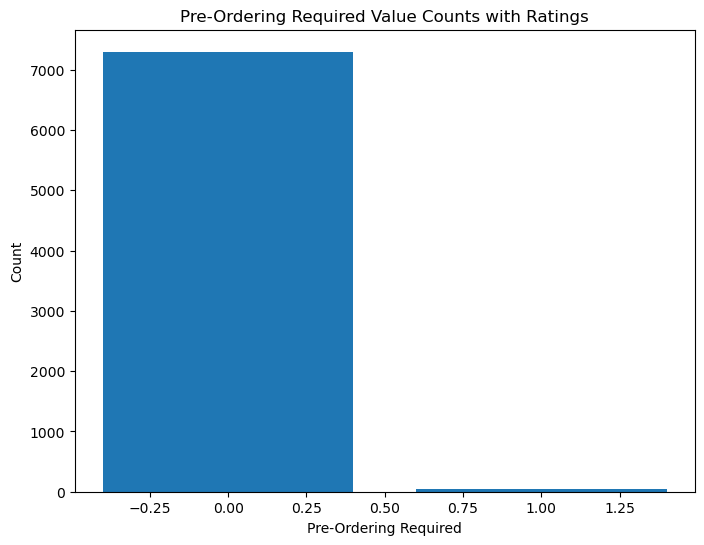

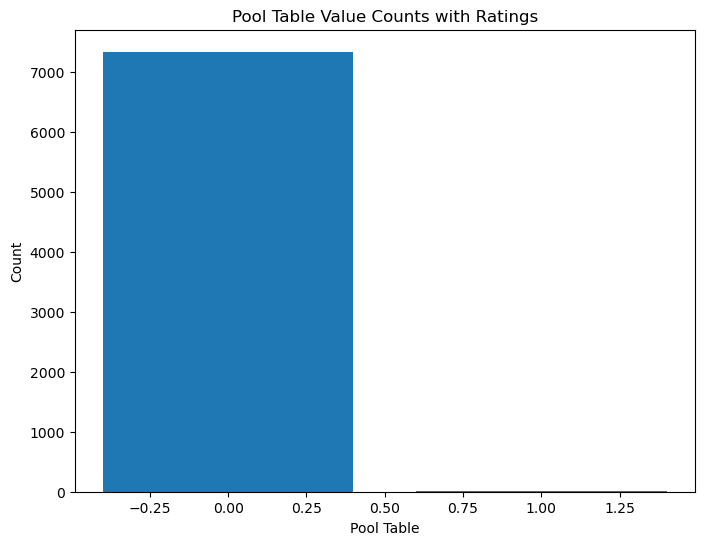

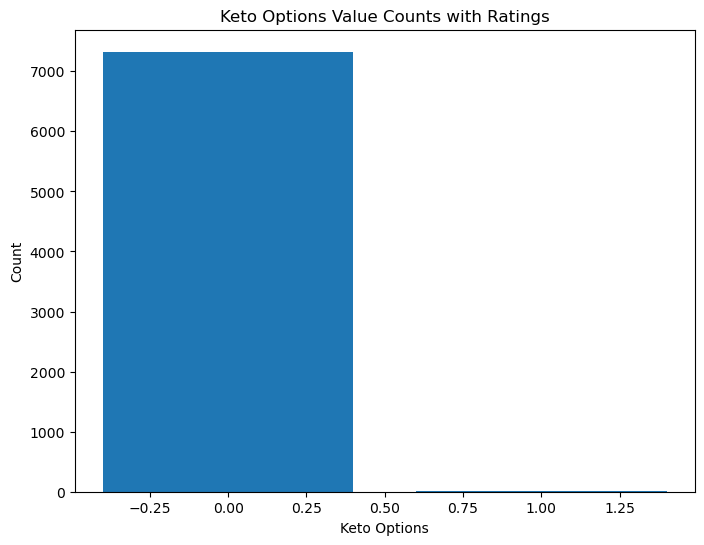

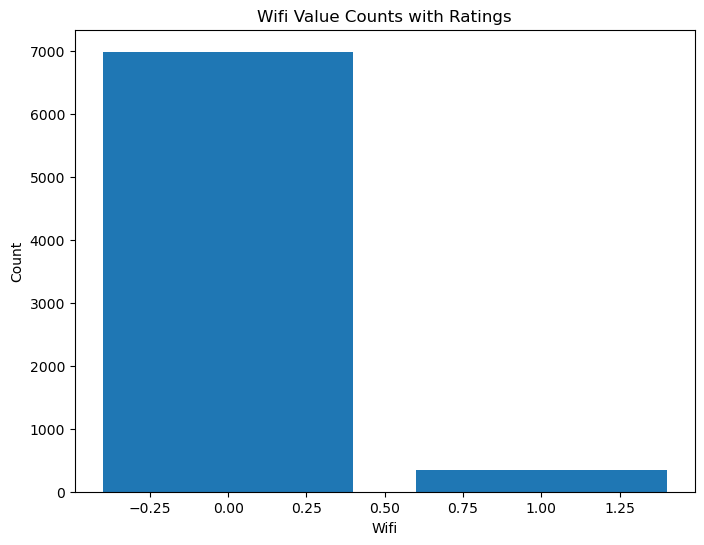

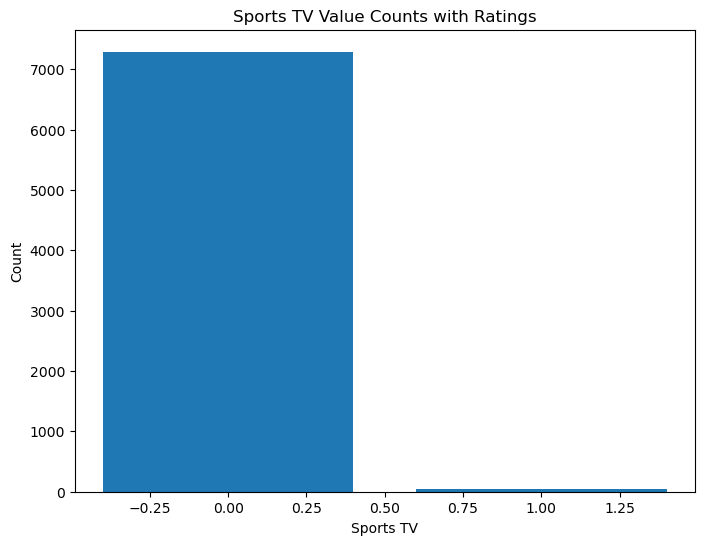

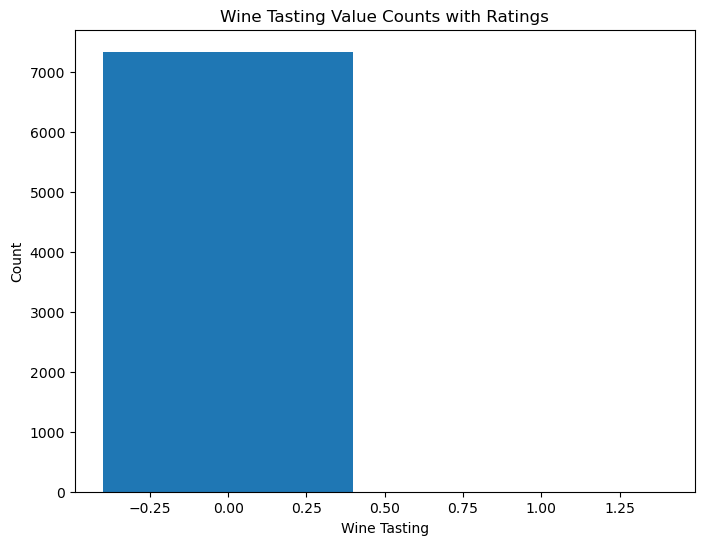

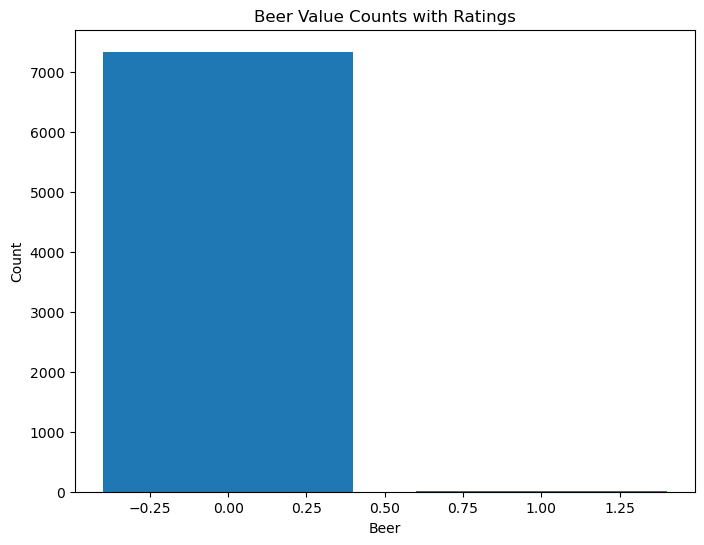

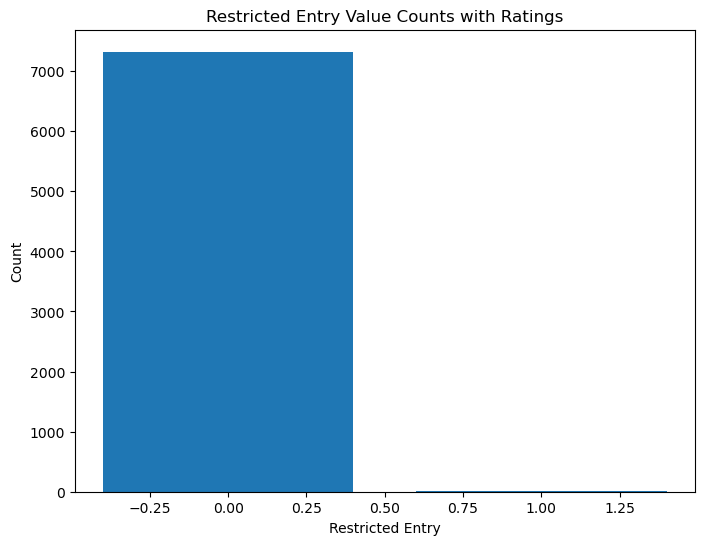

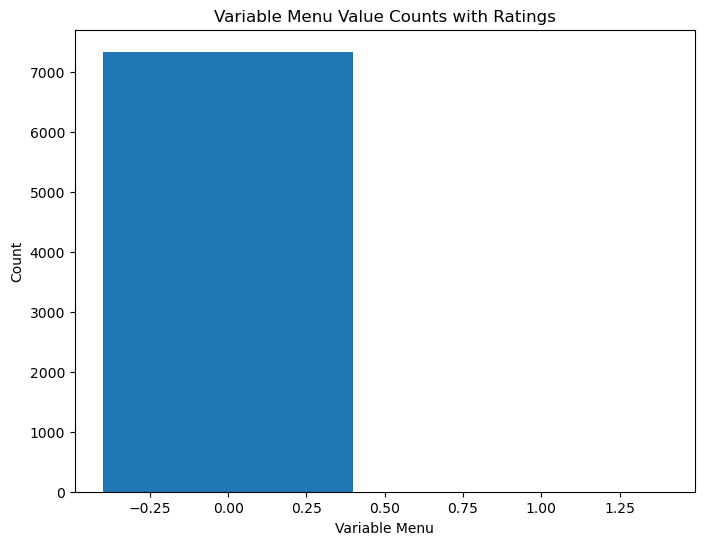

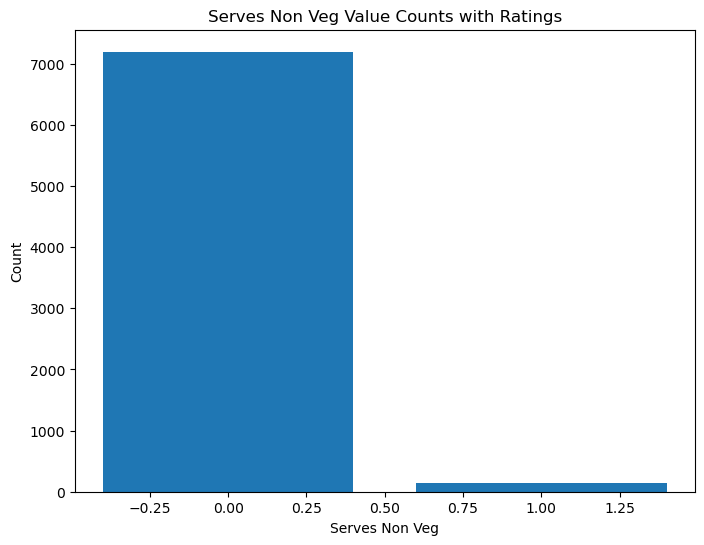

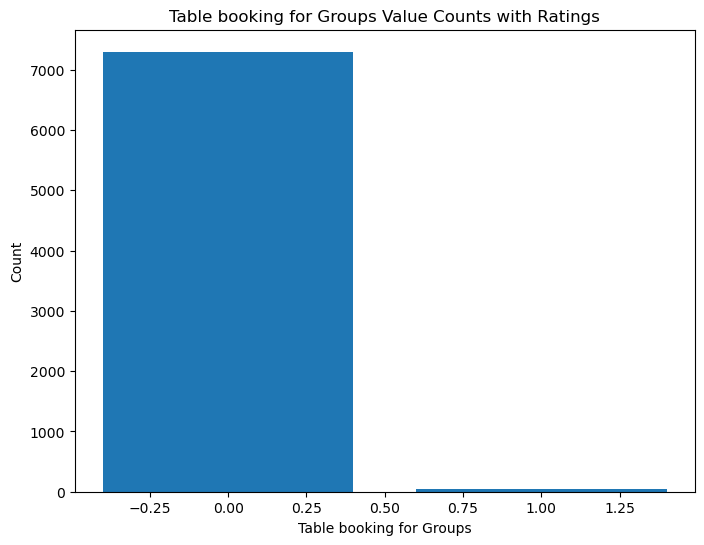

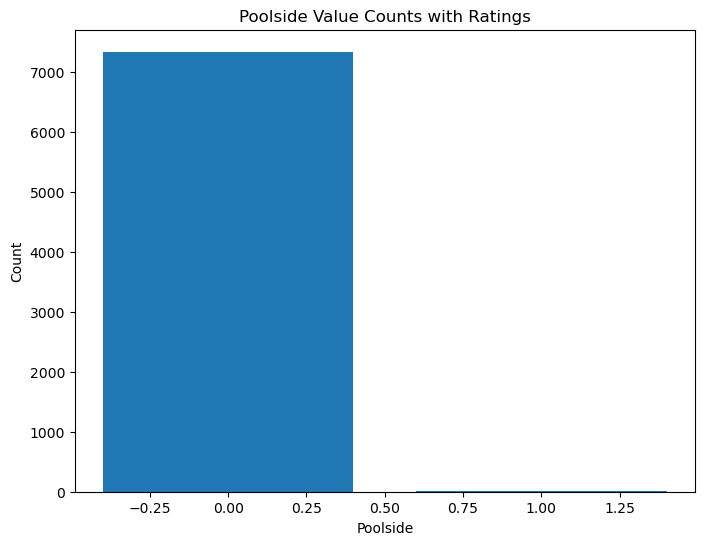

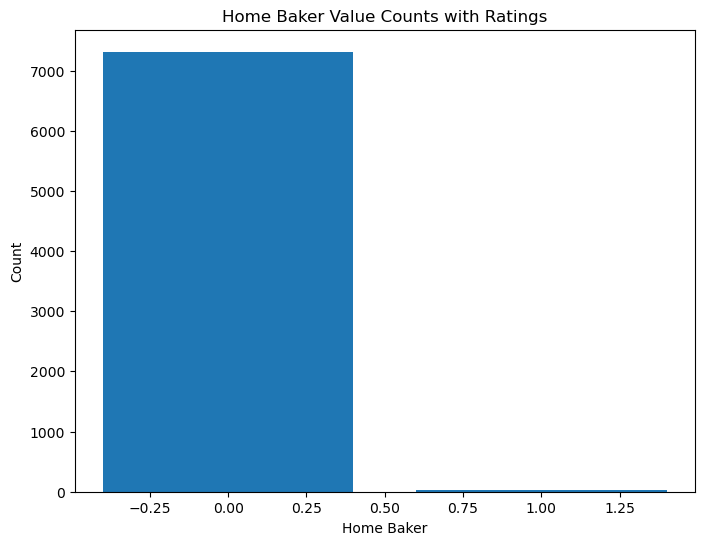

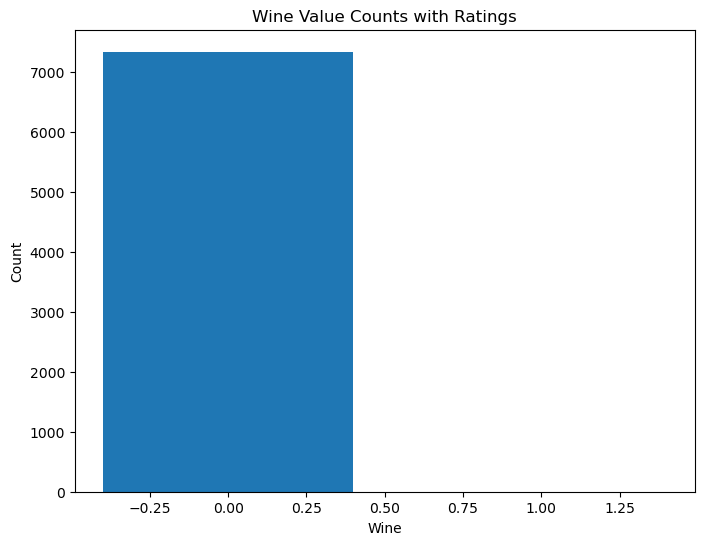

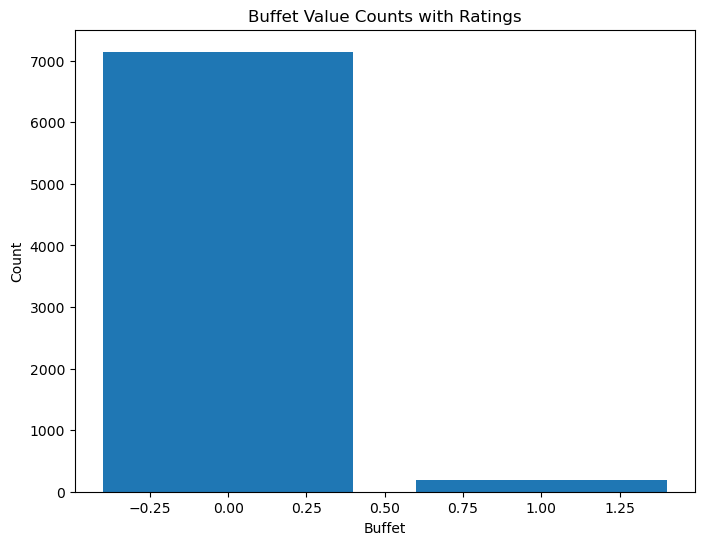

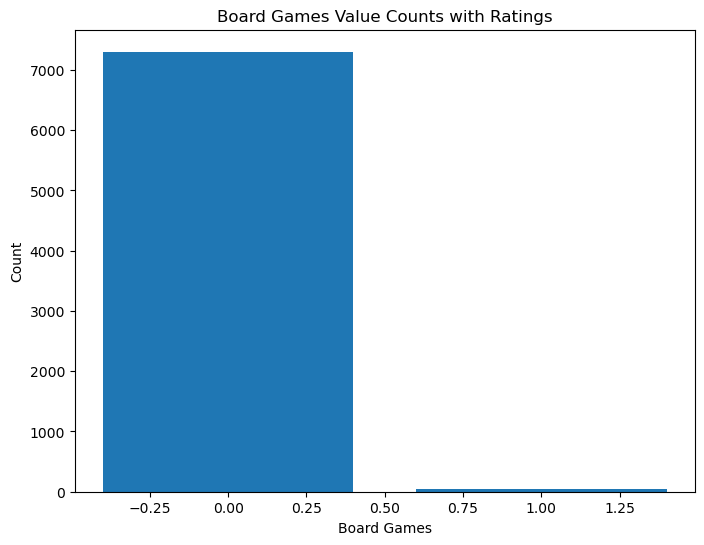

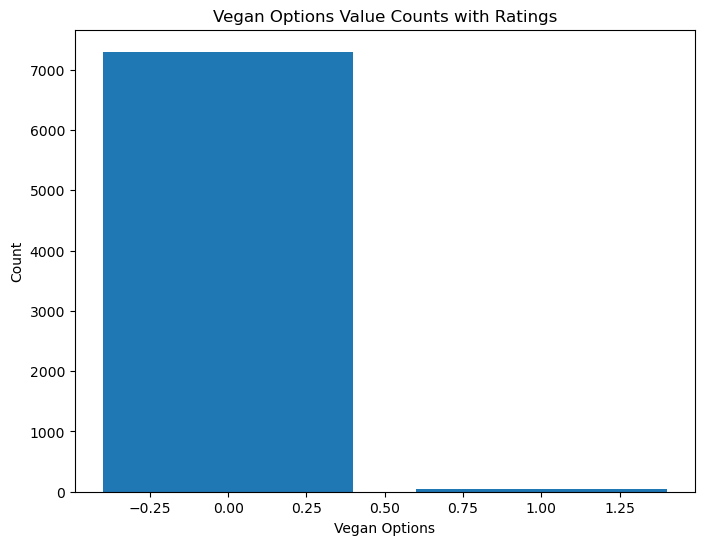

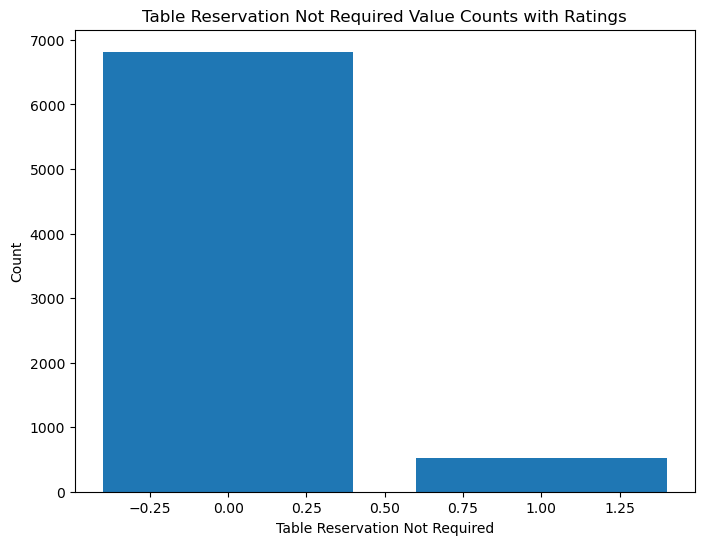

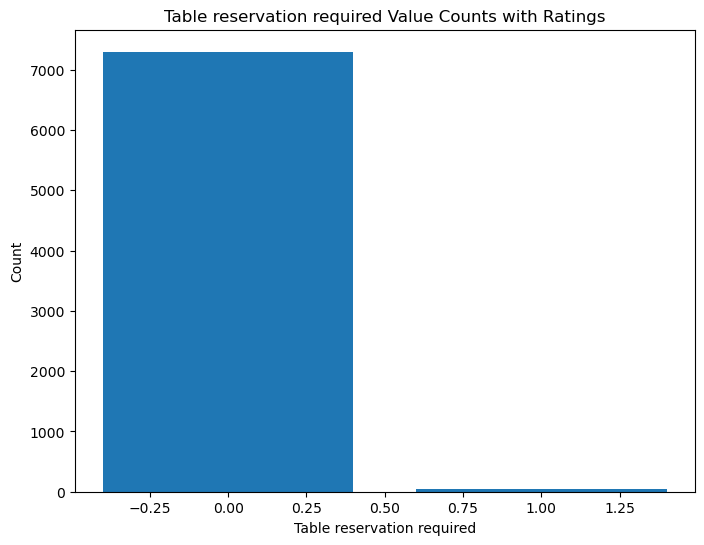

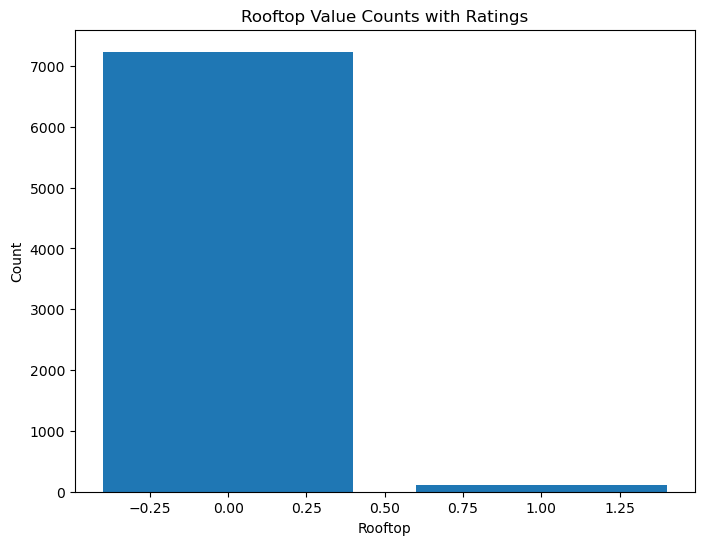

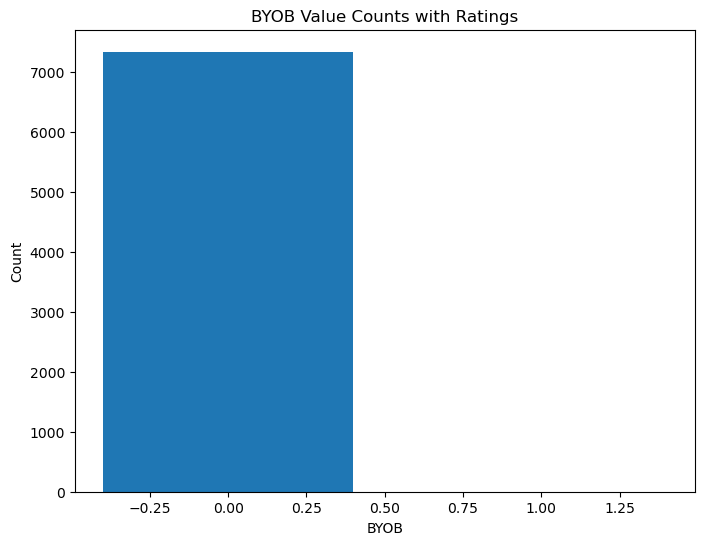

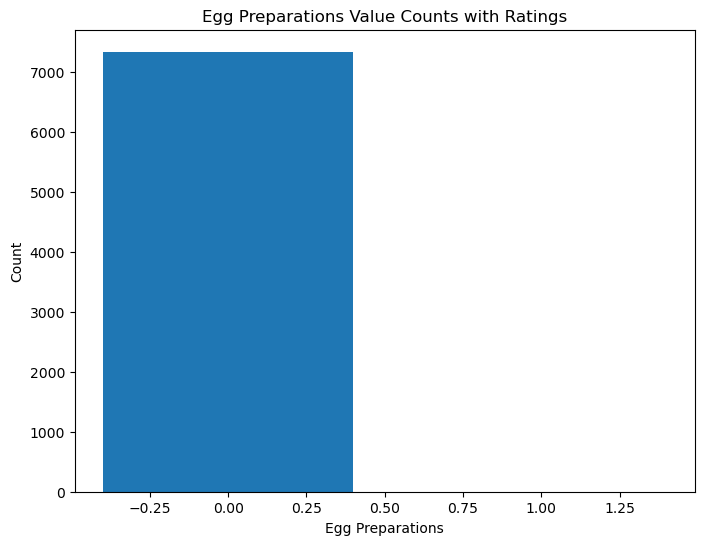

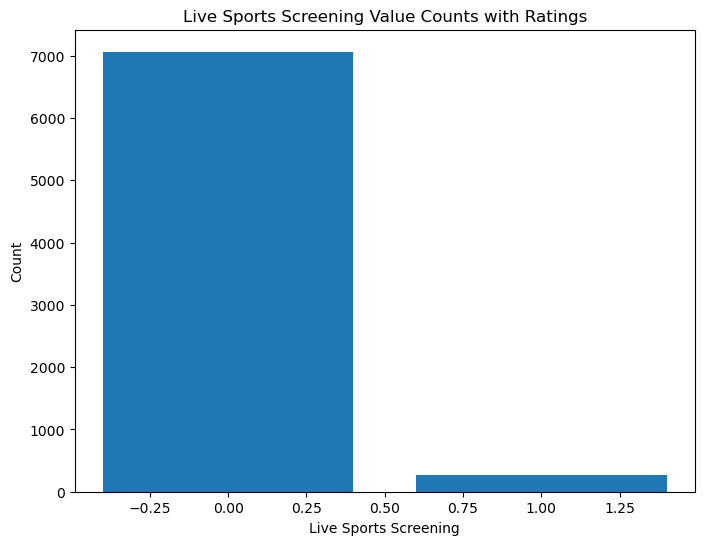

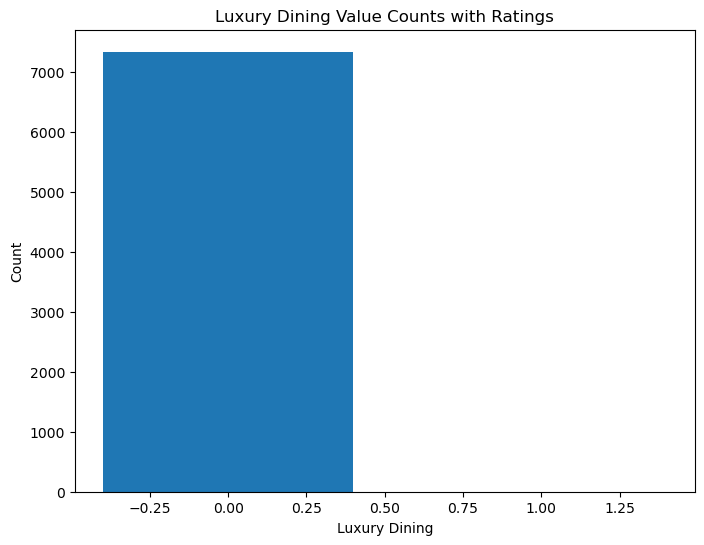

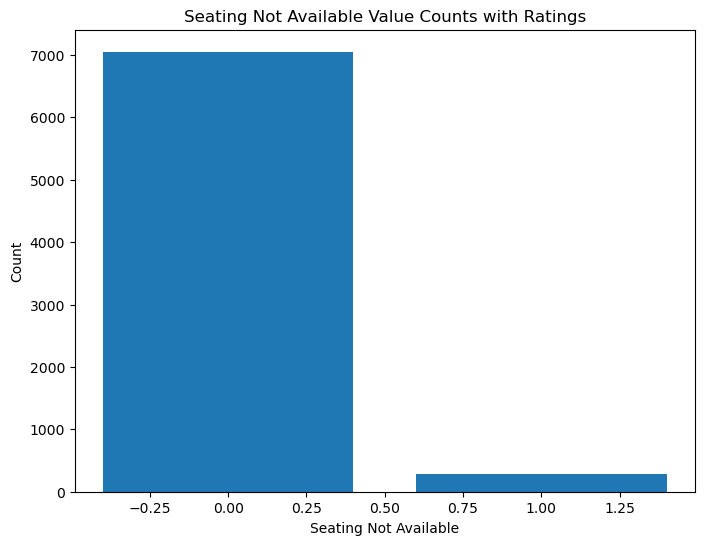

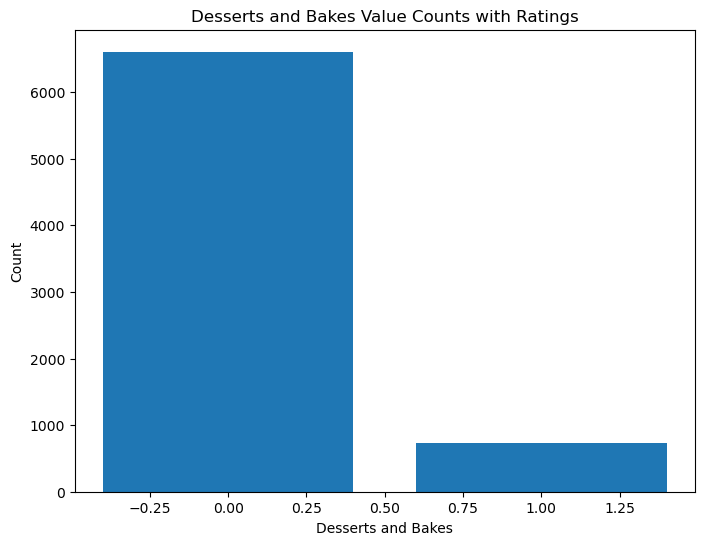

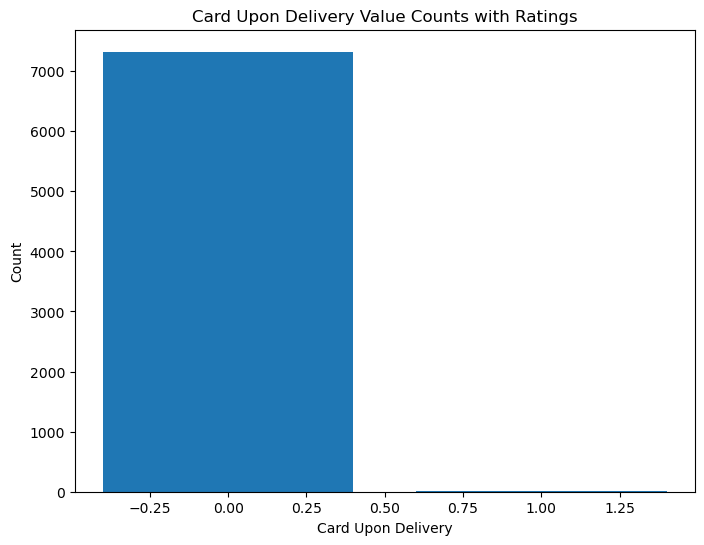

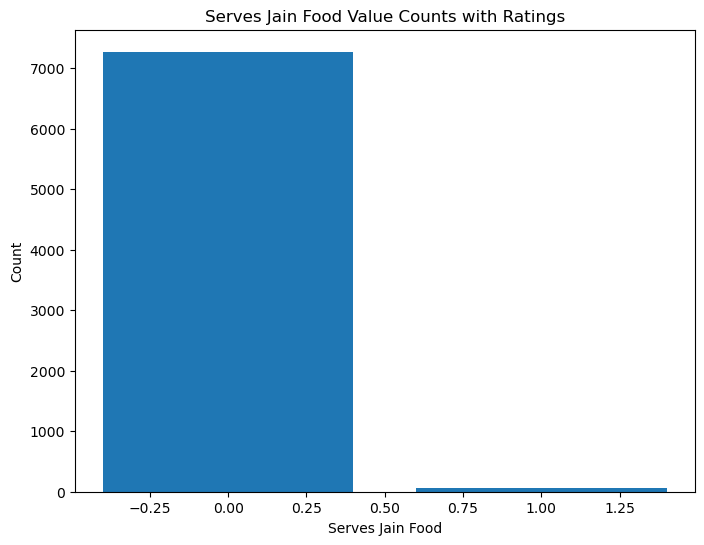

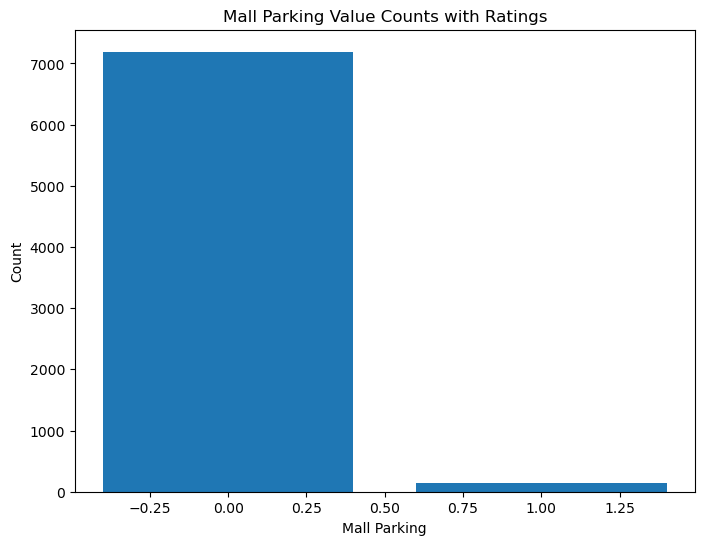

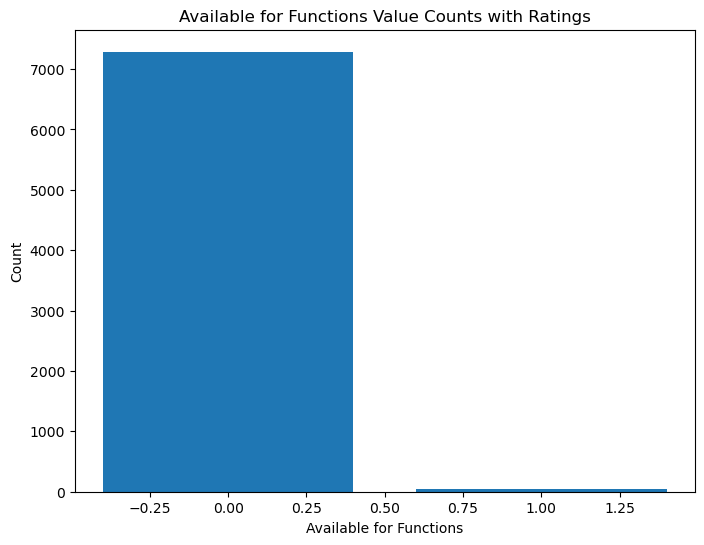

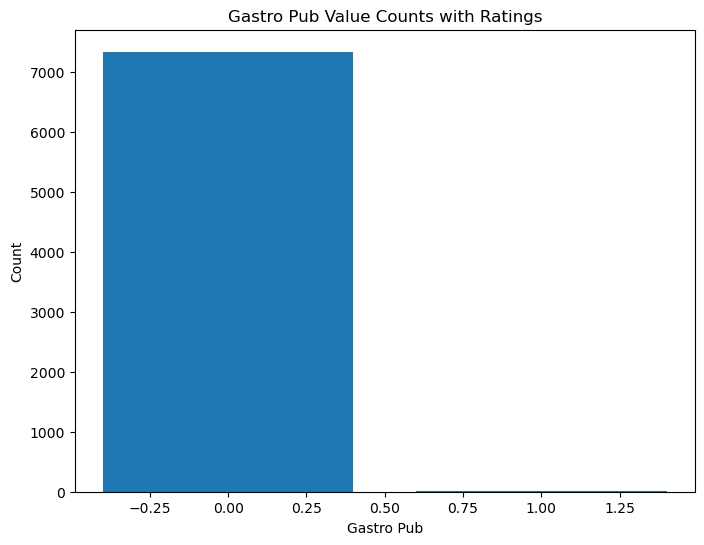

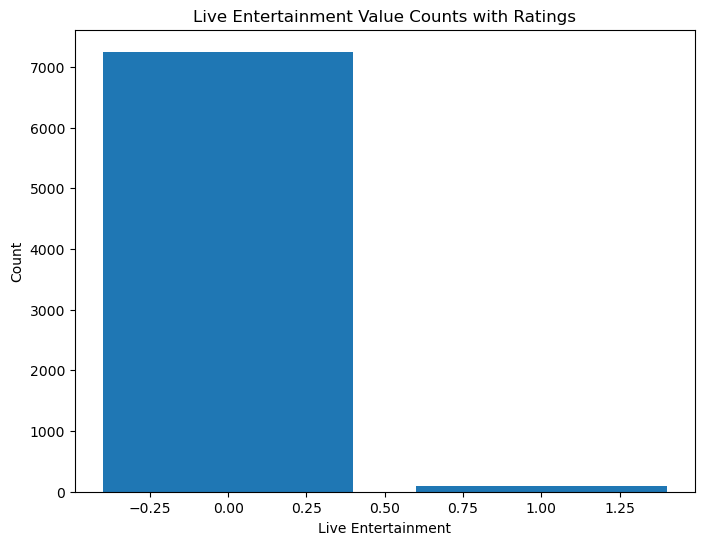

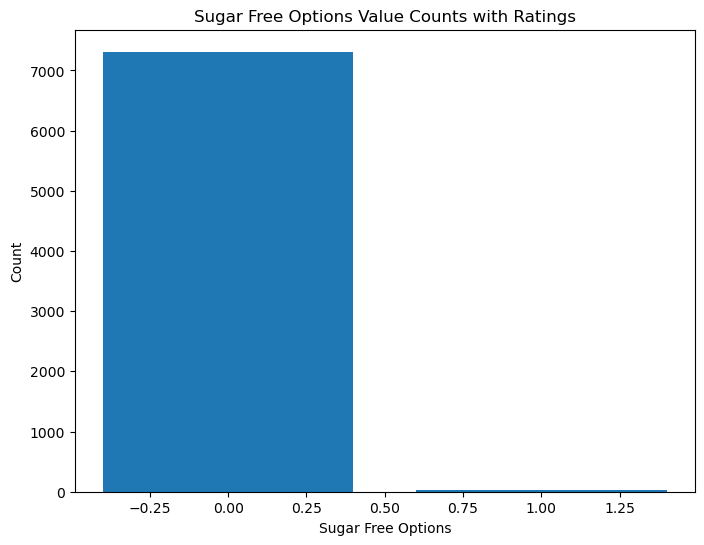

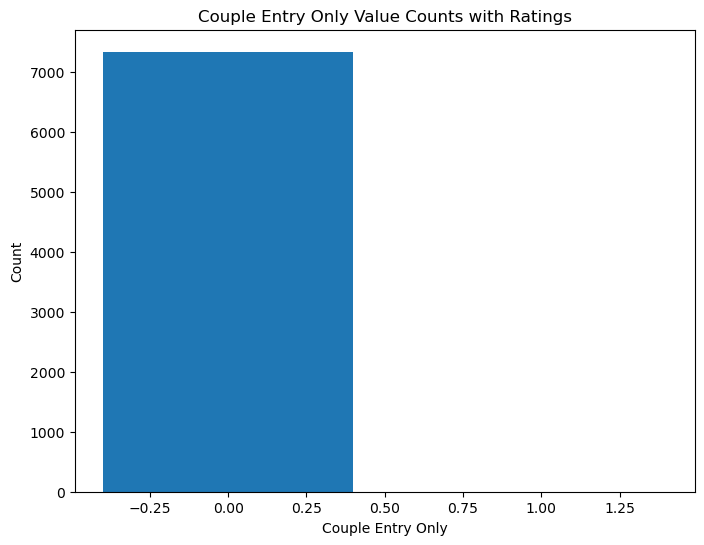

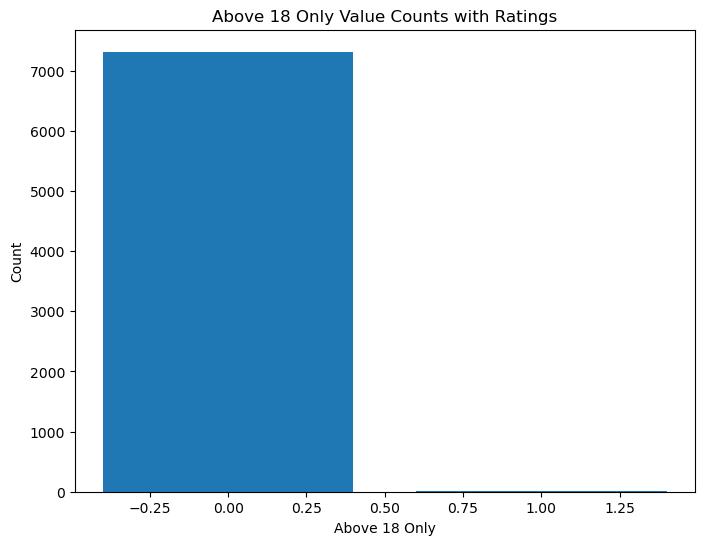

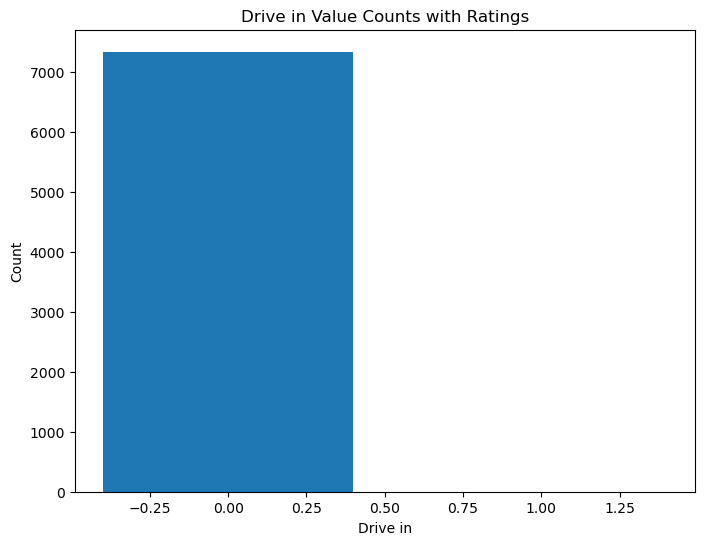

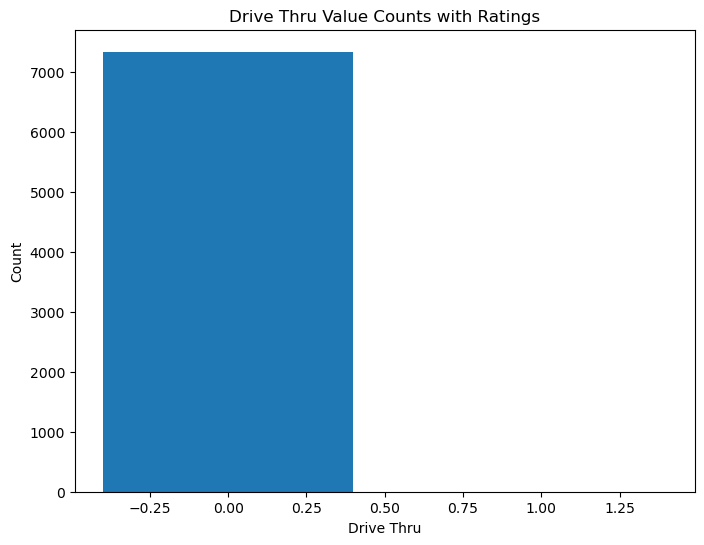

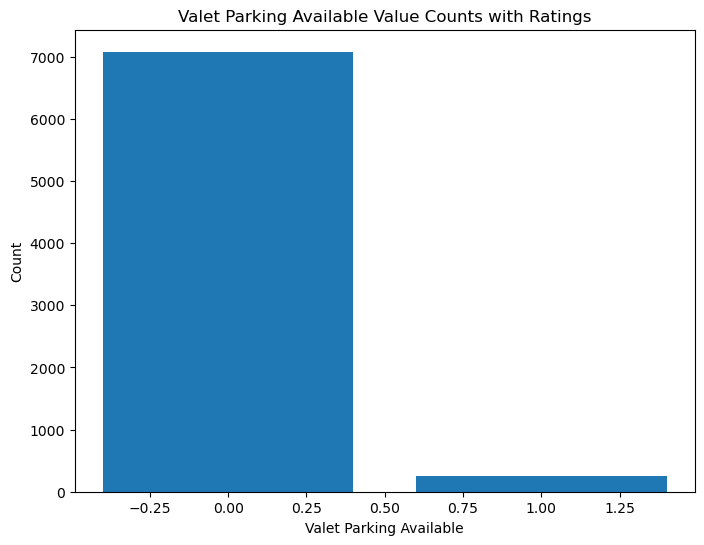

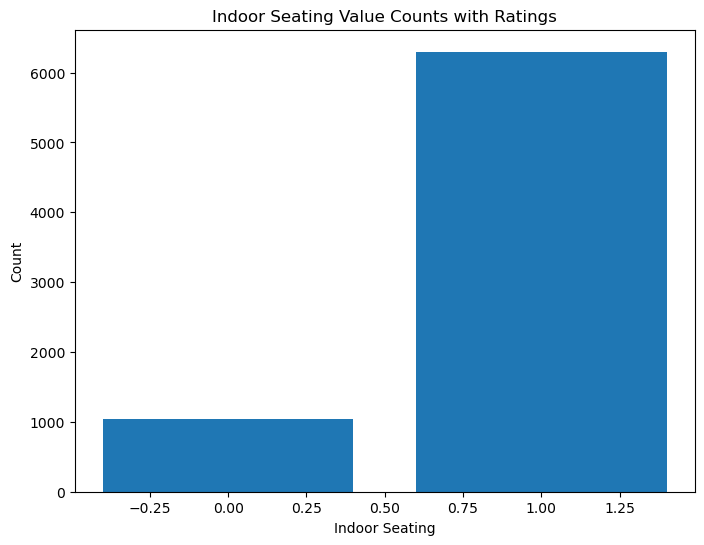

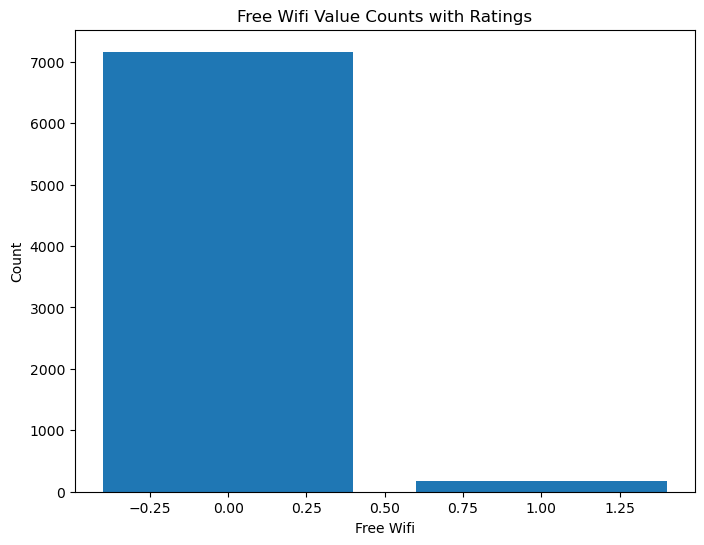

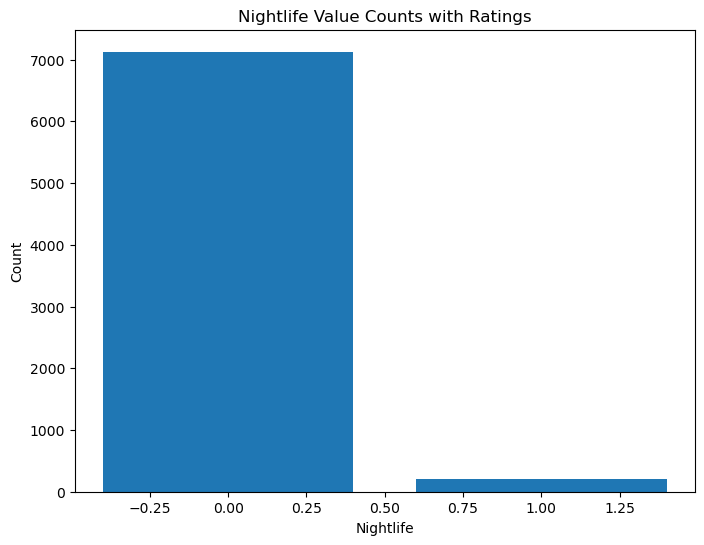

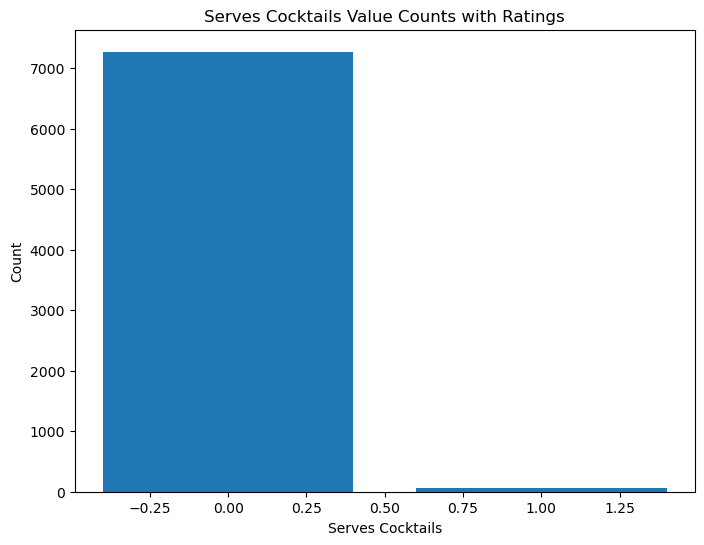

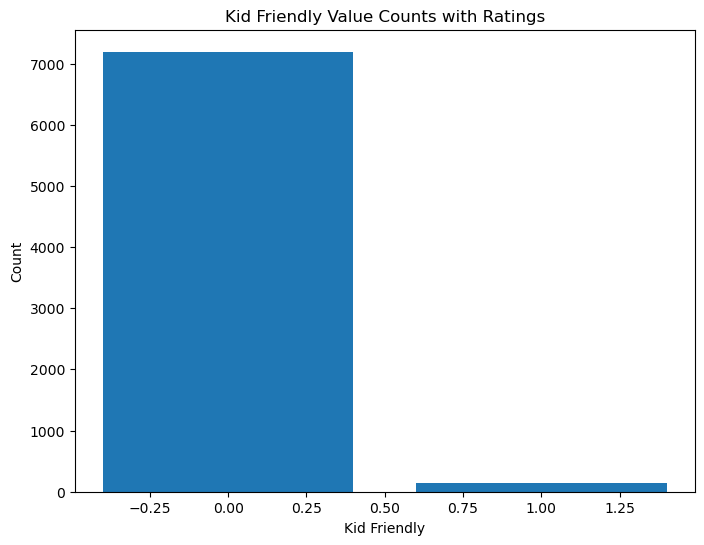

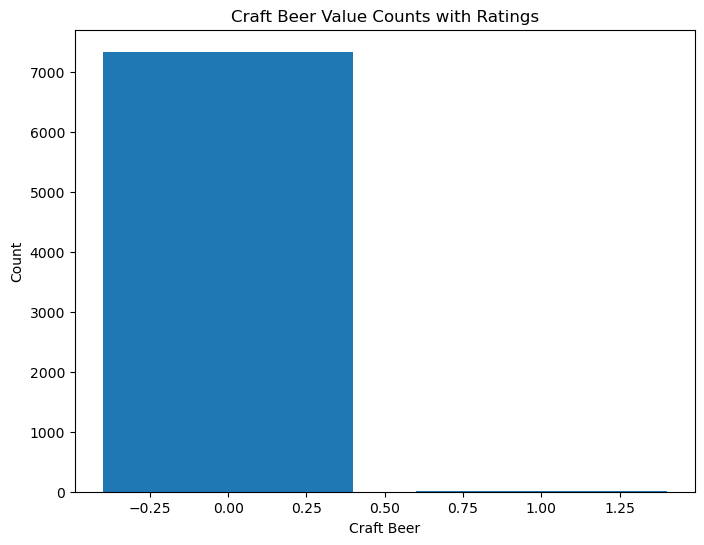

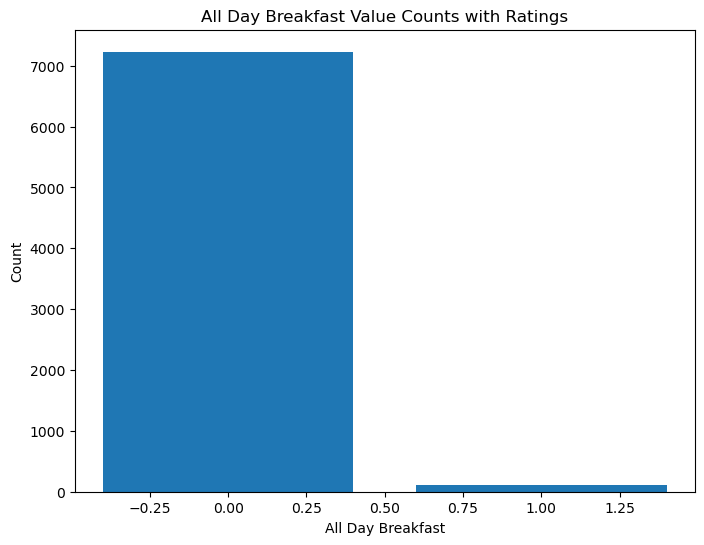

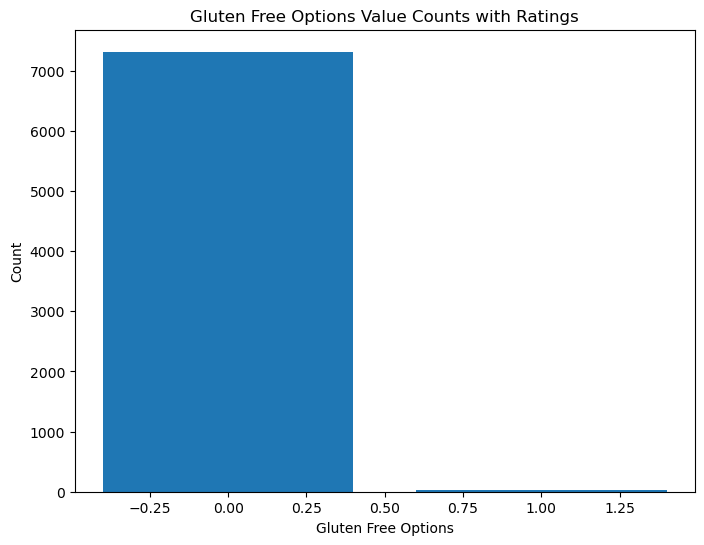

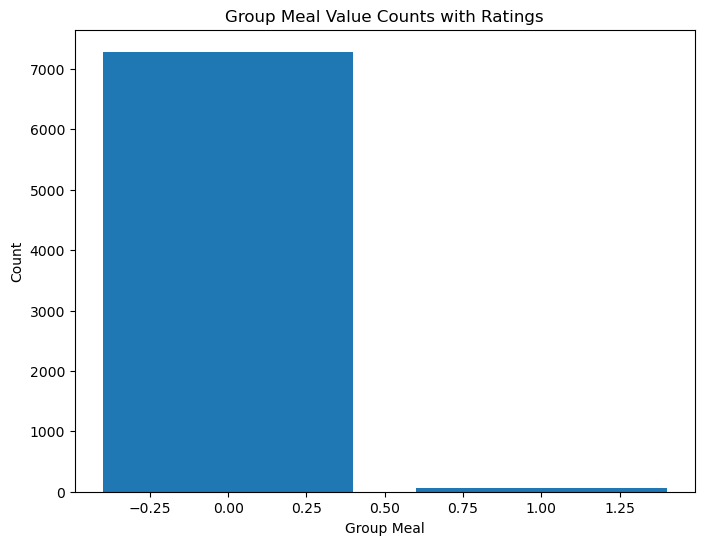

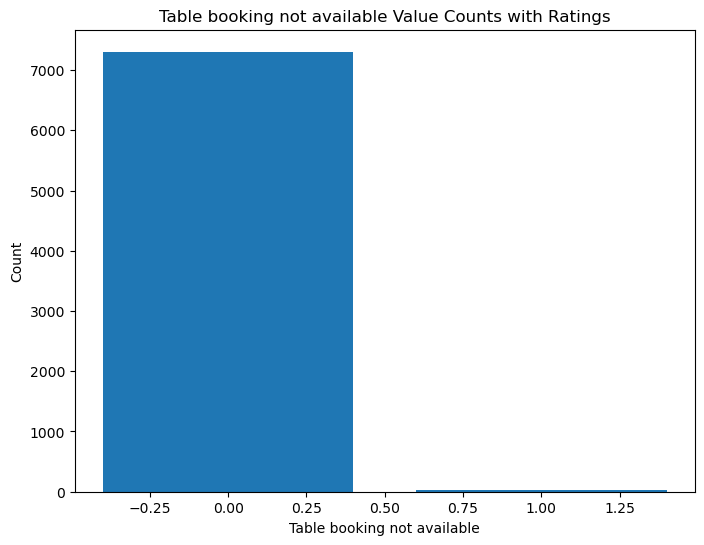

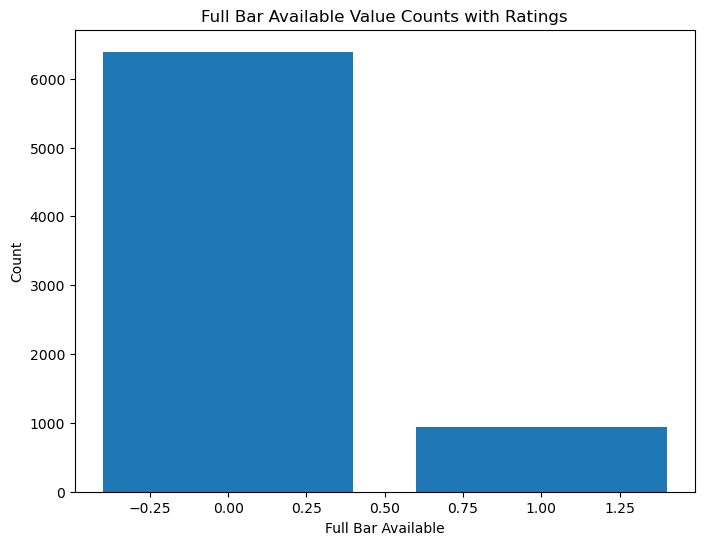

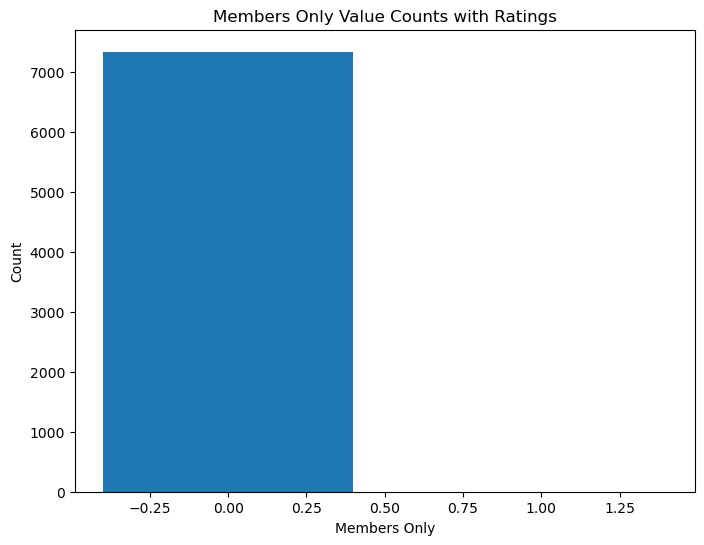

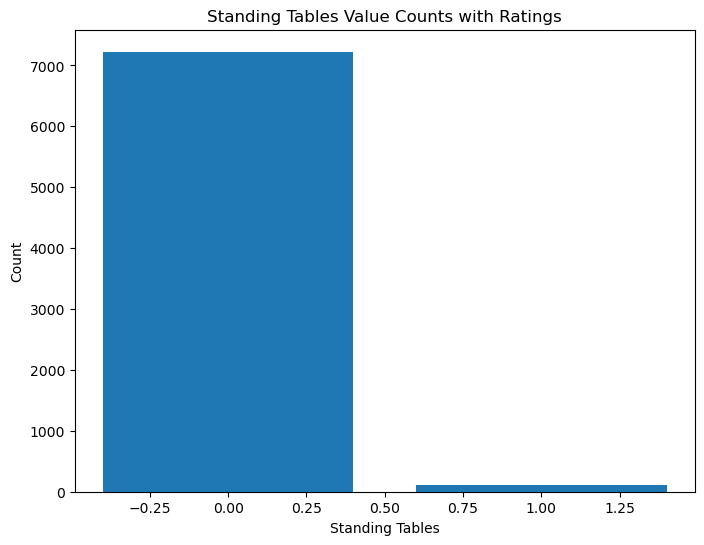

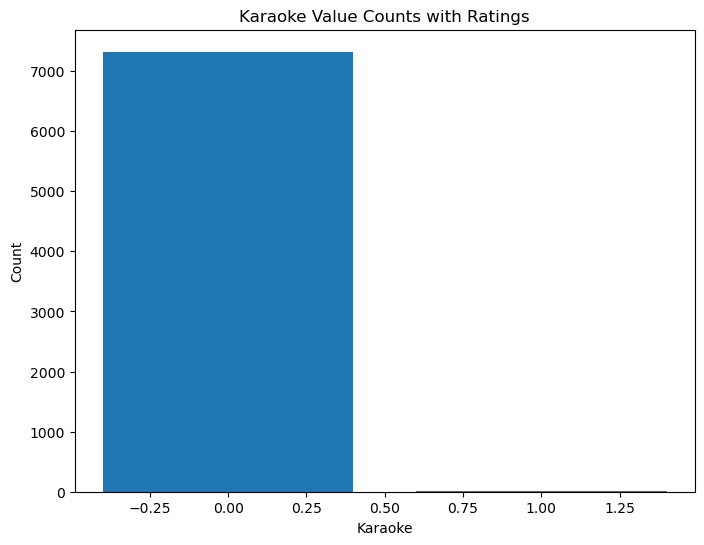

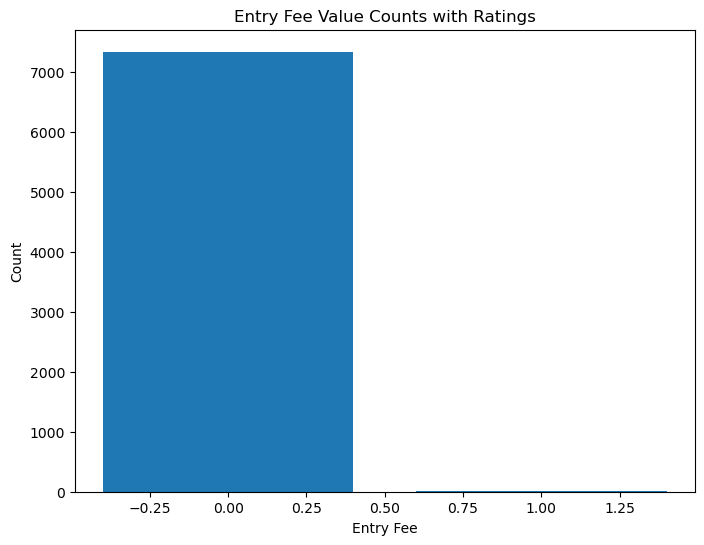

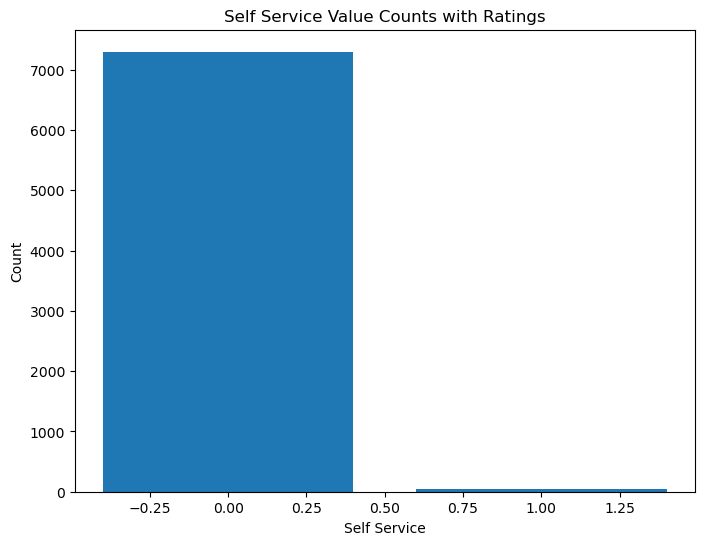

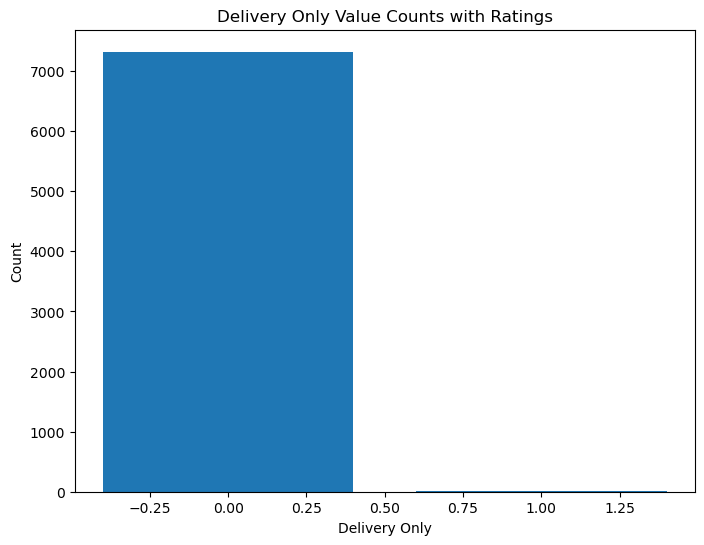

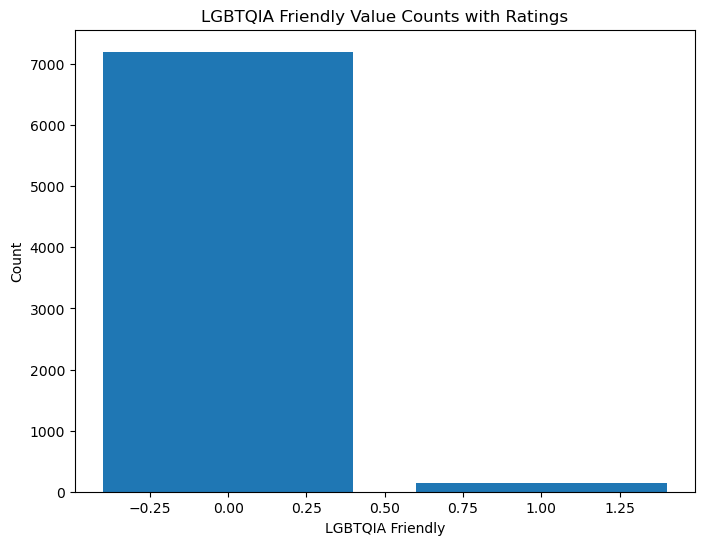

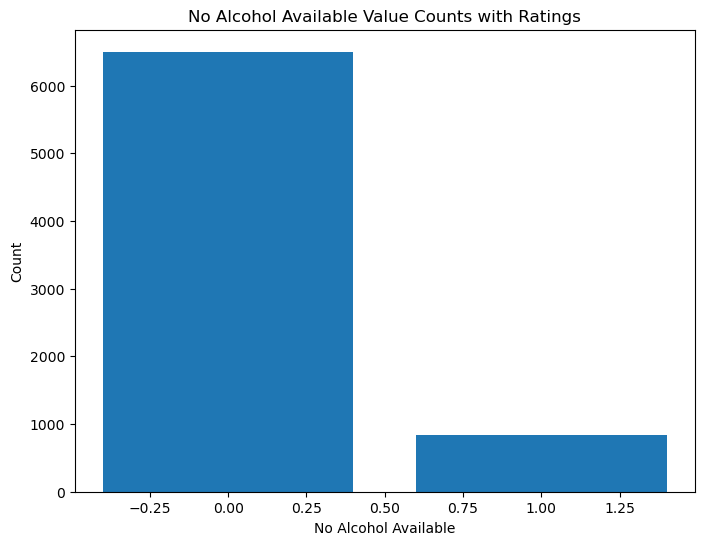

KeyError: 'Unlimited Pizza'

In [96]:
# Specify the columns to compare
columns = ['Pet Friendly', 'Bulk Orders Accepted', 'Gaming Are', 'City View', 'Vegetarian Only', 'Brunch', 'Live Music',
           'Wheelchair Accessible', 'Home Delivery', 'Celebrity Frequented', 'Pre-Ordering Required', 'Pool Table',
           'Keto Options', 'Wifi', 'Sports TV', 'Wine Tasting', 'Beer', 'Restricted Entry', 'Variable Menu',
           'Serves Non Veg', 'Table booking for Groups', 'Poolside', 'Home Baker', 'Wine', 'Buffet', 'Board Games',
           'Vegan Options', 'Table Reservation Not Required', 'Table reservation required', 'Rooftop', 'BYOB',
           'Egg Preparations', 'Live Sports Screening', 'Luxury Dining', 'Seating Not Available', 'Desserts and Bakes',
           'Card Upon Delivery', 'Serves Jain Food', 'Mall Parking', 'Available for Functions', 'Gastro Pub',
           'Live Entertainment', 'Sugar Free Options', 'Couple Entry Only', 'Above 18 Only', 'Drive in', 'Drive Thru',
           'Valet Parking Available', 'Indoor Seating', 'Free Wifi', 'Nightlife', 'Serves Cocktails', 'Kid Friendly',
           'Craft Beer', 'All Day Breakfast', 'Gluten Free Options', 'Group Meal', 'Table booking not available',
           'Full Bar Available', 'Members Only', 'Standing Tables', 'Karaoke', 'Entry Fee', 'Self Service',
           'Delivery Only', 'LGBTQIA Friendly', 'No Alcohol Available', 'Unlimited Pizza', 'Private Dining Area Available',
           'Smoking Area', 'Table booking recommended', 'Resto Bar', 'Serves Alcohol', 'Breakfast', 'Catering Available',
           'Disabled Friendly', 'Serves Halal', 'Takeaway Only', 'BYOB Only']

# Plot a separate graph for each column
for column in columns:
    # Create a DataFrame to store the value counts for the column
    value_counts_df = pd.DataFrame(zd[column].value_counts()).sort_index()

    # Plot the bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(value_counts_df.index, value_counts_df[column])
    
    # Set the x-axis label, y-axis label, and plot title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} Value Counts with Ratings')
    
    # Show the plot
    plt.show()

### examain spam_review

In [ ]:
zd['spam_review'].count()

In [ ]:
zd['spam_review'].head

In [ ]:
# Get the top 10 values based on 'spam_review' column
top_10_spam_review = zd['spam_review'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 localities
filtered_df = zd[zd['spam_review'].isin(top_10_spam_review.index)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot using Seaborn and Matplotlib
ax = sns.barplot(data=filtered_df, x='Ratings_out_of_5', y='spam_review', ci=None)

# Set the labels and title
plt.xlabel('Ratings_out_of_5')
plt.ylabel('spam_review')
plt.title('Top 10 spam_review with Ratings')

# Add value annotations above each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='center', va='center')

# Display the plot
plt.show()

#### Plot a HeatMap:
 

In [ ]:
# Select the columns of interest
columns_of_interest = ['Ratings_out_of_5', 'Outdoor Seating', 'Home Delivery','Seaside','City View','Celebrity Frequented','Beer']
subset_df = zp[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#Drop unwanted Columns:
del zd['Restaurant_Name']
del zd['Locality']
del zd['Sponsored']
del zd['Cuisines']
del zd['payment_modes']
del zd['Rest_timming']



In [ ]:
zd.dtypes

In [ ]:
zd.info()

In [ ]:
missing_values = zd.isnull().sum()
print(missing_values)


In [ ]:
#all missing values in rows
# Drop rows with missing values
zd.dropna(axis=0,inplace=True)

### Built Model


In [ ]:
zd.shape

In [ ]:
zd.columns

In [ ]:
x = zd.iloc[:, :-1].values
y = zd.iloc[:, -1].values

In [ ]:
x

In [ ]:
y

We now split our data into two random parts . One to build model on , Another to test its performance.
Option "random_state" is used to make our random operation reproducible.

In [ ]:
# Splitting into Train and Test Sets
zd_train, zd_test= train_test_split(zd, test_size=0.2, random_state=42)

In [ ]:
zd_test.shape


In [ ]:
zd_train.shape

### Apply Regressions Models

In [ ]:
linearRegression_model=LinearRegression()

Above line creates and object of class LinearRegression named lm. We can use this object to access all functions realted to LinearRegression.

Now we'll separate predictors and response for both the datasets . We'll also drop ID from predictor's list because it doesnt make sense to include an ID variable in the model. Variable "Amount.Funded.By.Investors" will also be dropped because it wont be available until the loan has been processed. We can use only those variables which are present at the point of the business process where we want to apply our model.

In [ ]:
x_train=zd_train.drop(["Ratings_out_of_5"],1)
y_train=zd_train["Ratings_out_of_5"]
x_test=zd_test.drop(["Ratings_out_of_5"],1)
y_test=zd_test["Ratings_out_of_5"]

In [ ]:

x_train.shape,x_test.shape,y_train.shape,y_test.shape

### Apply Regressions Models

#### 1. Linear Regression 

In [ ]:
linearRegression_model.fit(x_train,y_train)

In [ ]:
y_pred=linearRegression_model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

### Cross validation for linearRegression

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
accuracy_scores = cross_val_score(linearRegression_model,x_test , y_test, cv=10)

# Compute mean accuracy
mean_accuracy = np.mean(accuracy_scores)

# Print accuracy scores and mean accuracy
print("Accuracy scores:", accuracy_scores)
print("Mean accuracy:", mean_accuracy)

In [ ]:
# Use score method to get accuracy of model
score = linearRegression_model.score(x_test, y_test)
print(score)

### LinearRegression, Ridge, Lasso, ElasticNet

#### 2. Ridge Regression 

In [ ]:
rr=Ridge()
rr

In [ ]:
rr.fit(x_train,y_train)

In [ ]:
print(rr.score(x_train,y_train))
print(rr.score(x_test,y_test))

In [ ]:
rr_pred=rr.predict(x_test)

In [ ]:
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

#### 3 Lasso

In [ ]:
lr=Lasso()
lr

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

In [ ]:
lr_pred=lr.predict(x_test)

In [ ]:
lr_score=r2_score(y_test,lr_pred)*100
print("Accuracy score for LR :",lr_score)

### APPLYING RANDOM FOREST REGRESSION

In [ ]:
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)

In [ ]:
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

In [ ]:
r2_score(y_test,y_predict)

#### cross validation score of random forest regration

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
accuracy_scores = cross_val_score(RForest,x_test , y_test, cv=10)

# Compute mean accuracy
mean_accuracy = np.mean(accuracy_scores)

# Print accuracy scores and mean accuracy
print("Accuracy scores:", accuracy_scores)
print("Mean accuracy:", mean_accuracy)

#### Apply MSE and RMSE Methods

In [ ]:
y_pred = RForest.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

In [ ]:
# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

 ### Applying Decision_tree Regressor

In [ ]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)

In [ ]:
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

In [ ]:
r2_score(y_test,y_predict)

### Cross validation for DTree

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
accuracy_scores = cross_val_score(DTree,x_test , y_test, cv=10)

# Compute mean accuracy
mean_accuracy = np.mean(accuracy_scores)

# Print accuracy scores and mean accuracy
print("Accuracy scores:", accuracy_scores)
print("Mean accuracy:", mean_accuracy)